## Problem Statement

### Objective

Goal:
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.

Datasets
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform

Metric to measure
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.1 MB/s eta 0:00:00


In [3]:
from catboost import CatBoostClassifier

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
df = pd.read_csv("Train_set.csv")

In [10]:
df.shape

(93174, 23)

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [5]:
print(df.head())
print(df.tail())

         ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade  \
0  72199369       9000   3 years          9.170          B            B2   
1  14257956      18000   3 years         13.650          C            C1   
2  66216451      16000   3 years          7.260          A            A4   
3  46974169      25000   3 years         13.990          C            C4   
4  46725961      17000   3 years          6.390          A            A2   

  job_experience home_ownership  annual_income income_verification_status  \
0       <5 Years            OWN      85000.000               Not Verified   
1       <5 Years            OWN      64000.000                   Verified   
2       <5 Years       MORTGAGE     150000.000            Source Verified   
3            NaN       MORTGAGE      59800.000                   Verified   
4      10+ years       MORTGAGE      72000.000            Source Verified   

         loan_purpose state_code  debt_to_income  delinq_2yrs  public_records  \

#### Understand the shape of the dataset

In [6]:
df.shape

(93174, 23)



> 12 columns and approx. 25K rows



#### Check the data types of the columns for the dataset

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [9]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [11]:
df.describe()

ID  loan_amnt  interest_rate  annual_income  debt_to_income  \
count    93174.000  93174.000      93174.000      93173.000       93174.000   
mean  35050211.389  14733.861         13.233      75028.259          18.128   
std   24149262.074   8428.185          4.369      69454.784           8.563   
min      70735.000    500.000          5.320       1200.000           0.000   
25%   10859832.500   8000.000          9.990      45000.000          11.930   
50%   37107507.000  13000.000         12.990      64000.000          17.640   
75%   58598949.500  20000.000         16.200      90000.000          23.890   
max   73519746.000  35000.000         28.990    9500000.000         672.520   

       delinq_2yrs  public_records  revolving_balance  total_acc  \
count    93172.000       93172.000          93174.000  93172.000   
mean         0.317           0.196          16854.469     25.249   
std          0.881           0.581          23689.074     11.855   
min          0.000           0.000              0.000      1.000   
25%          0.000           0.000           6433.000     17.000   
50%          0.000           0.000          11856.000     24.000   
75%          0.000           0.000          20745.000     32.000   
max         22.000          49.000        2560703.000    119.000   

       interest_receive  last_week_pay  total_current_balance  \
count         93174.000      91250.000              85788.000   
mean           1747.264         58.155             139252.923   
std            2088.236         44.327             157686.791   
min               0.000          0.000                  0.000   
25%             439.880         22.000              29642.000   
50%            1070.755         48.000              79363.500   
75%            2219.613         83.000             207160.000   
max           23172.310        291.000            8000078.000   

       total_revolving_limit   default  
count              85788.000 93174.000  
mean               32085.903     0.238  
std                47052.515     0.426  
min                    0.000     0.000  
25%                14000.000     0.000  
50%                23700.000     0.000  
75%                39700.000     0.000  
max              9999999.000     1.000



> Negative Value in the no_of_employees must be fixed.



In [12]:
df.describe(include='object')

loan_term loan_grade loan_subgrade job_experience home_ownership  \
count      93174      93174         93174          88472          93174   
unique         2          7            35              3              5   
top      3 years          B            B4       <5 Years       MORTGAGE   
freq       65211      26865          5879          40610          46445   

       income_verification_status        loan_purpose state_code  \
count                       93174               93174      93174   
unique                          3                   4         50   
top               Source Verified  debt_consolidation         CA   
freq                        34487               55241      13744   

       application_type  
count             93174  
unique                2  
top          INDIVIDUAL  
freq              93118

#### Let's check the count of each unique category in each of the categorical variables

In [13]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("---------------------")

loan_term
3 years    65211
5 years    27963
Name: count, dtype: int64
---------------------
loan_grade
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: count, dtype: int64
---------------------
loan_subgrade
B4    5879
B3    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: count, dtype: int64
---------------------
job_experience
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: count, dtype: int64
---------------------
home_ownership
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: count, dtype: int64
---------------------
income_verification_status
Source Verified    344

### Univariate Analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(25, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

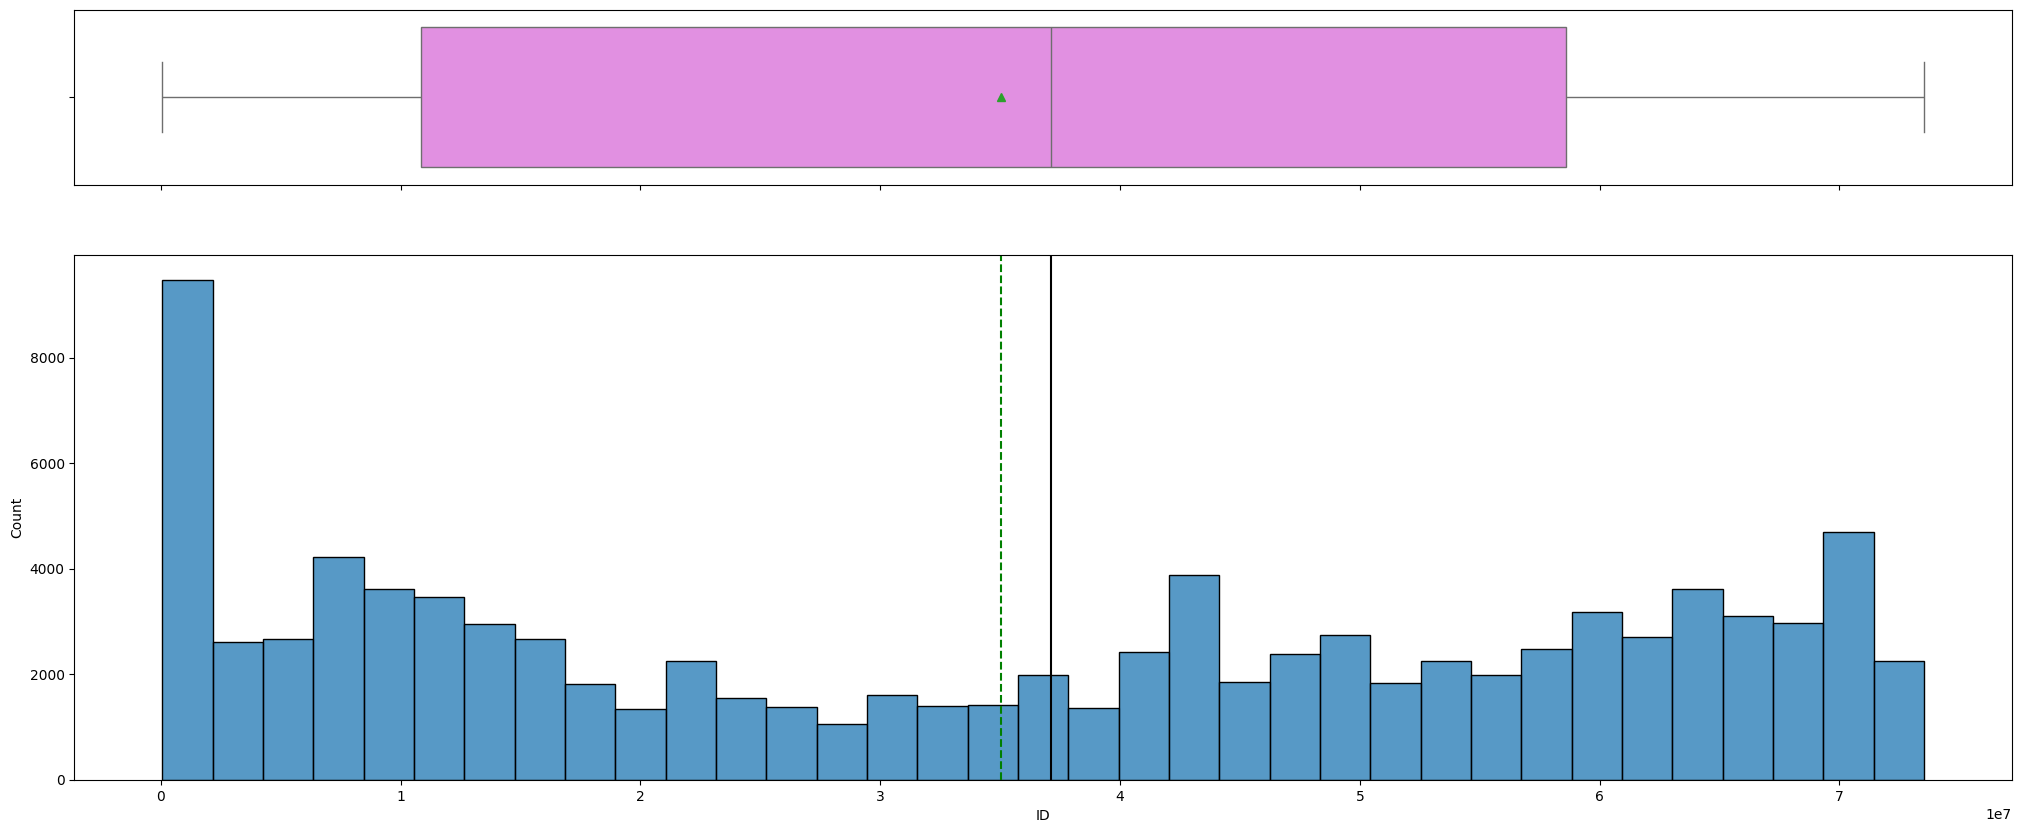

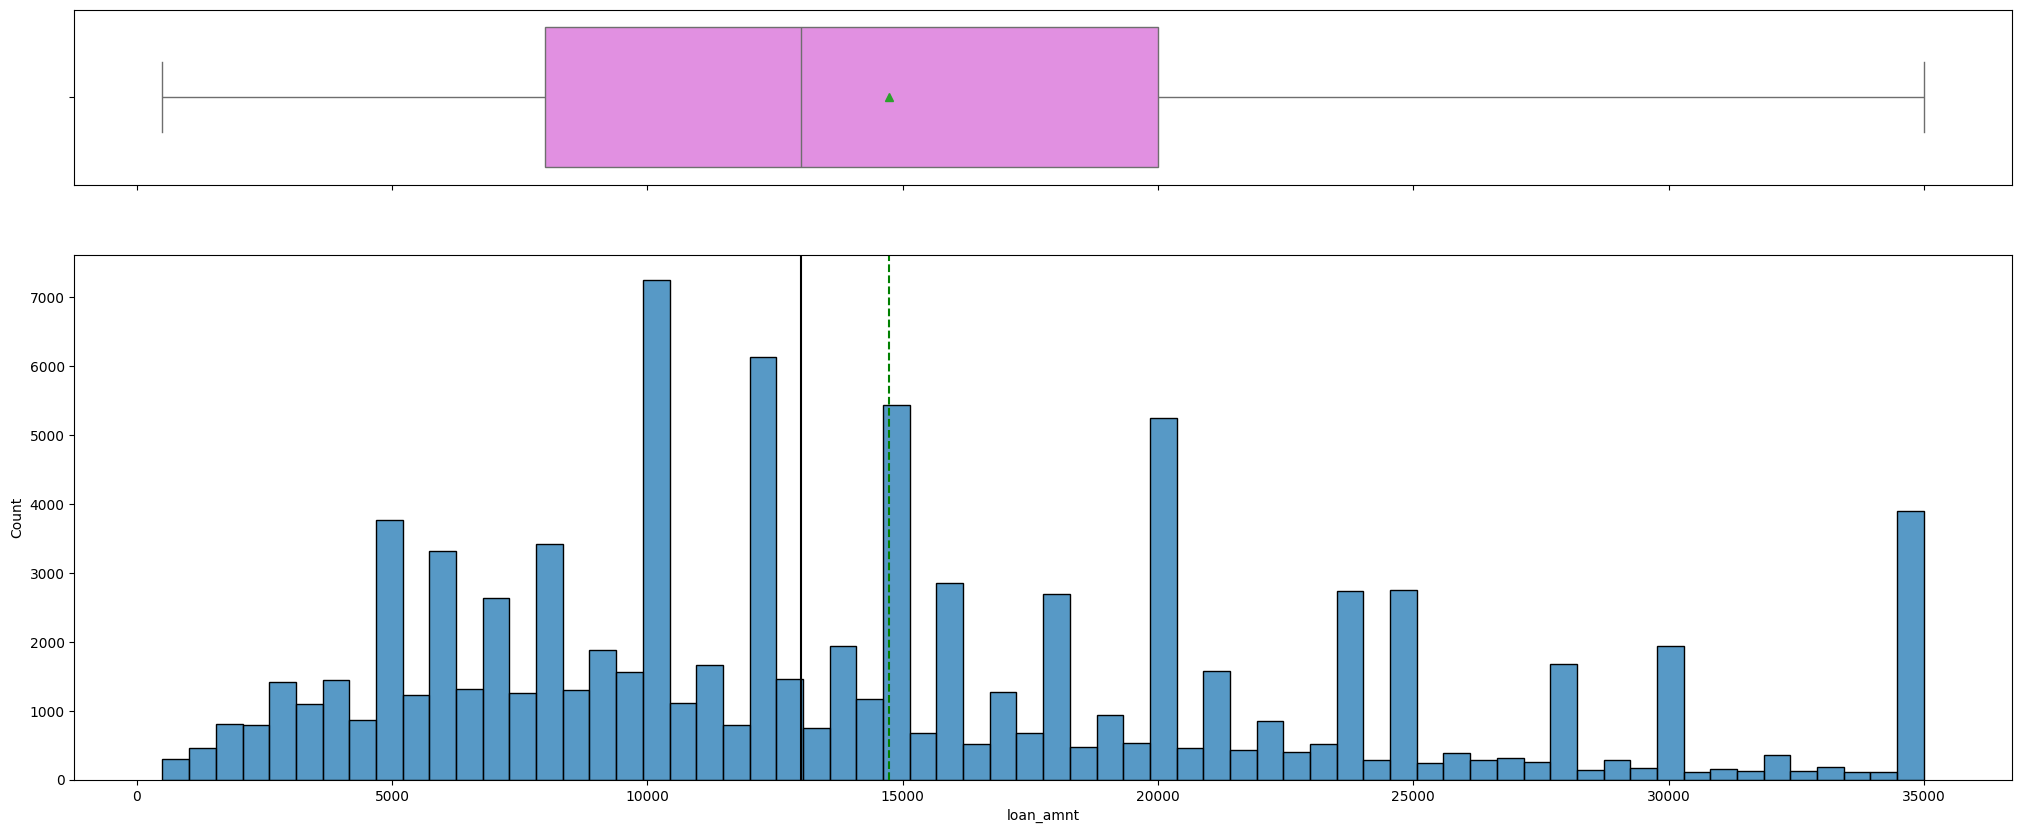

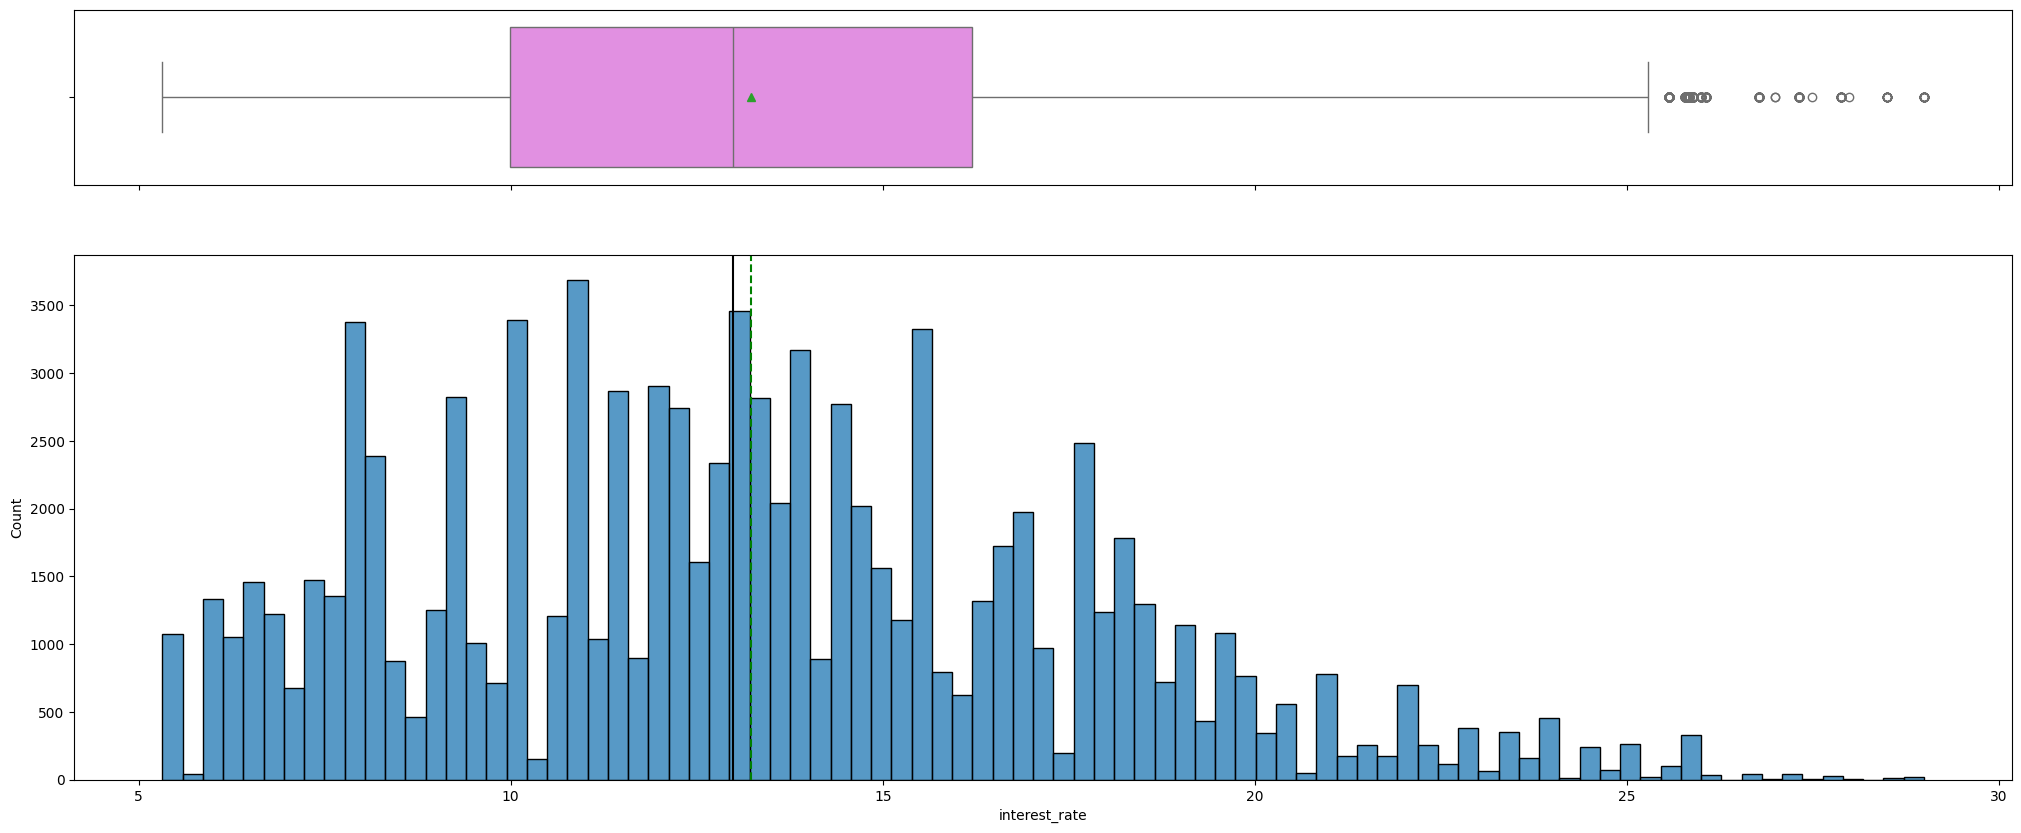

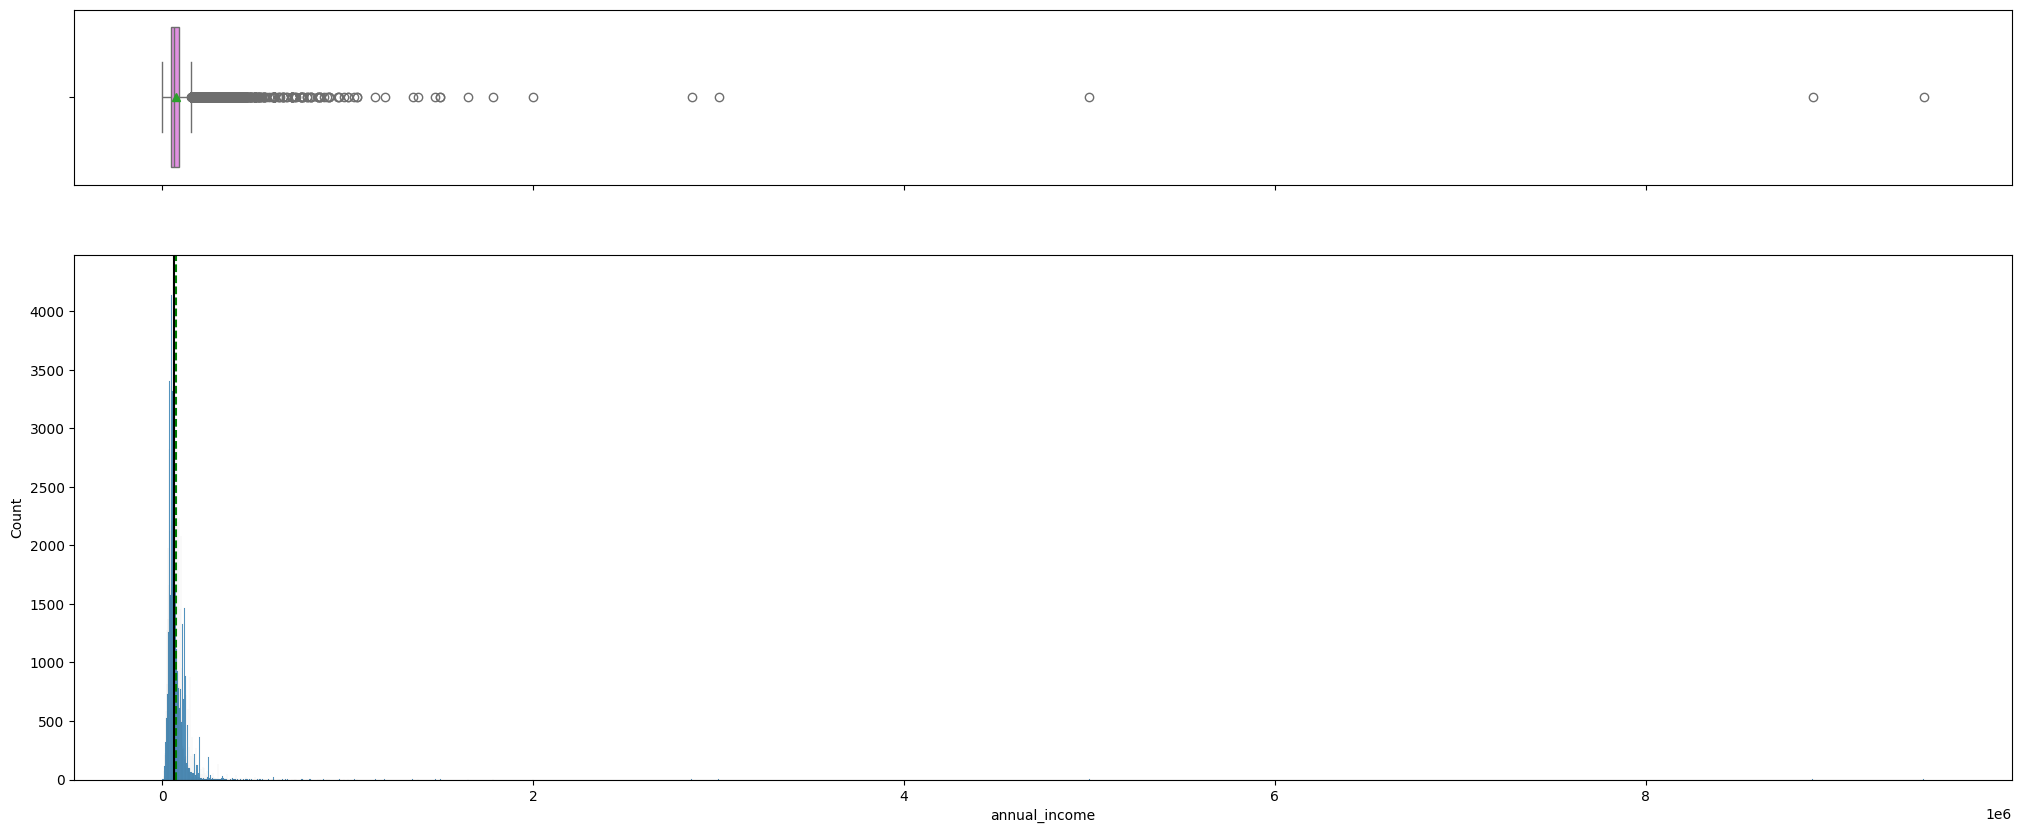

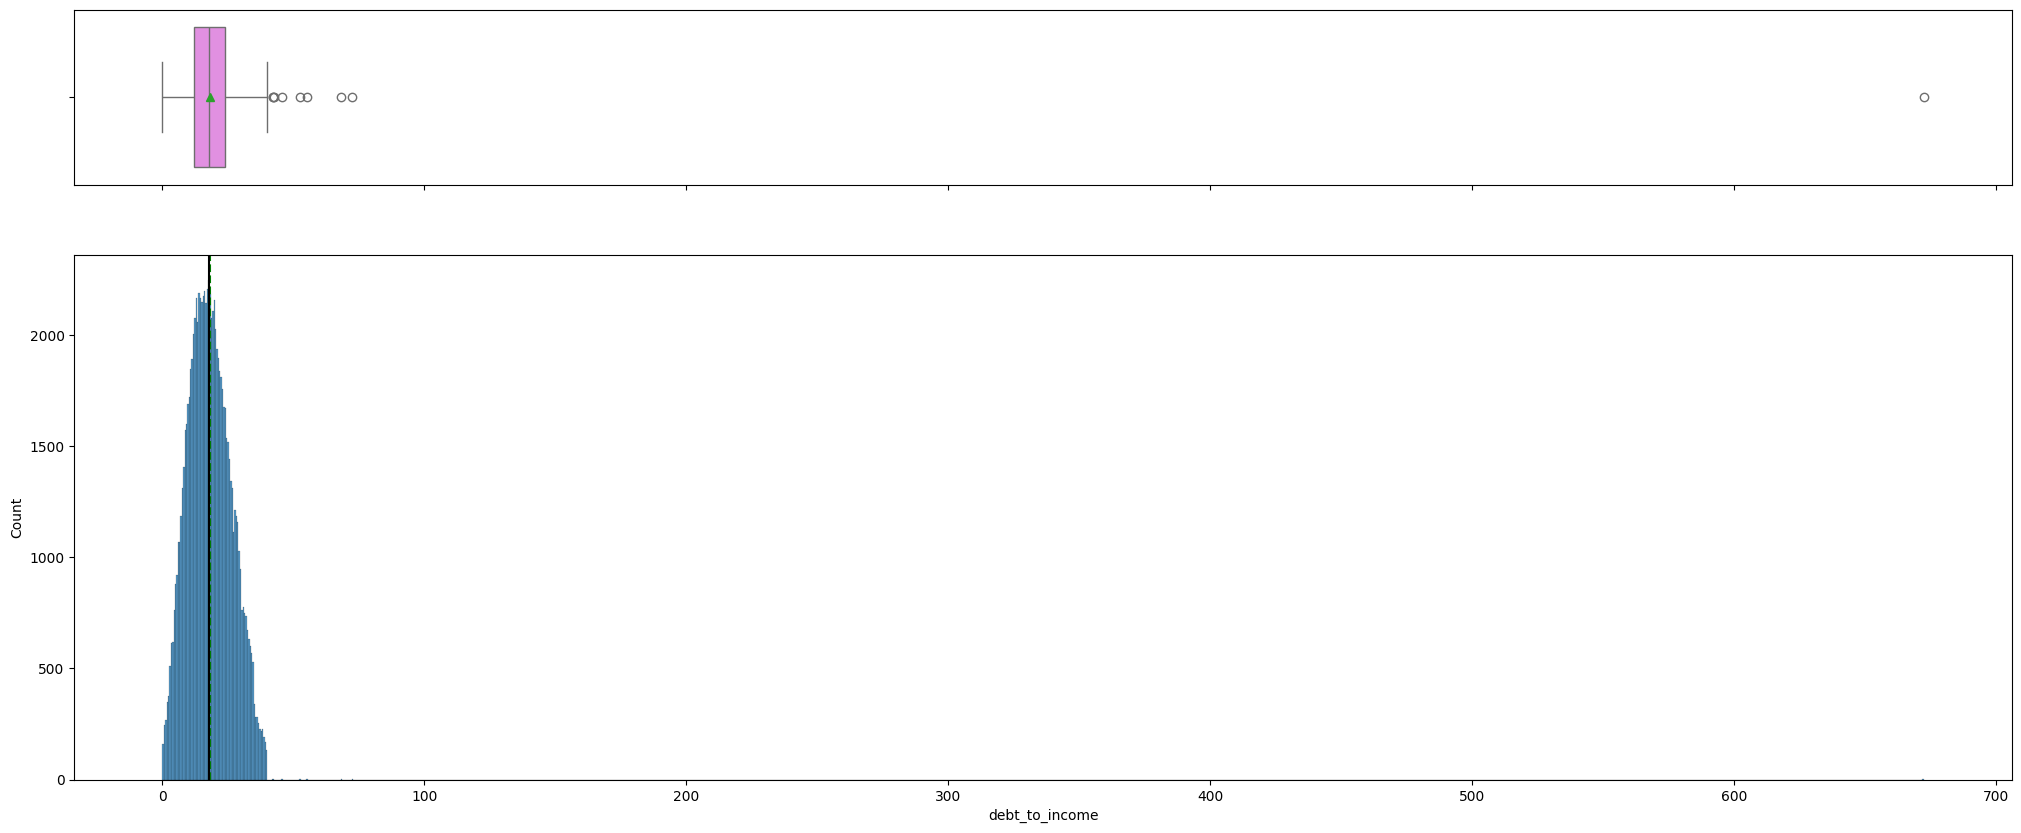

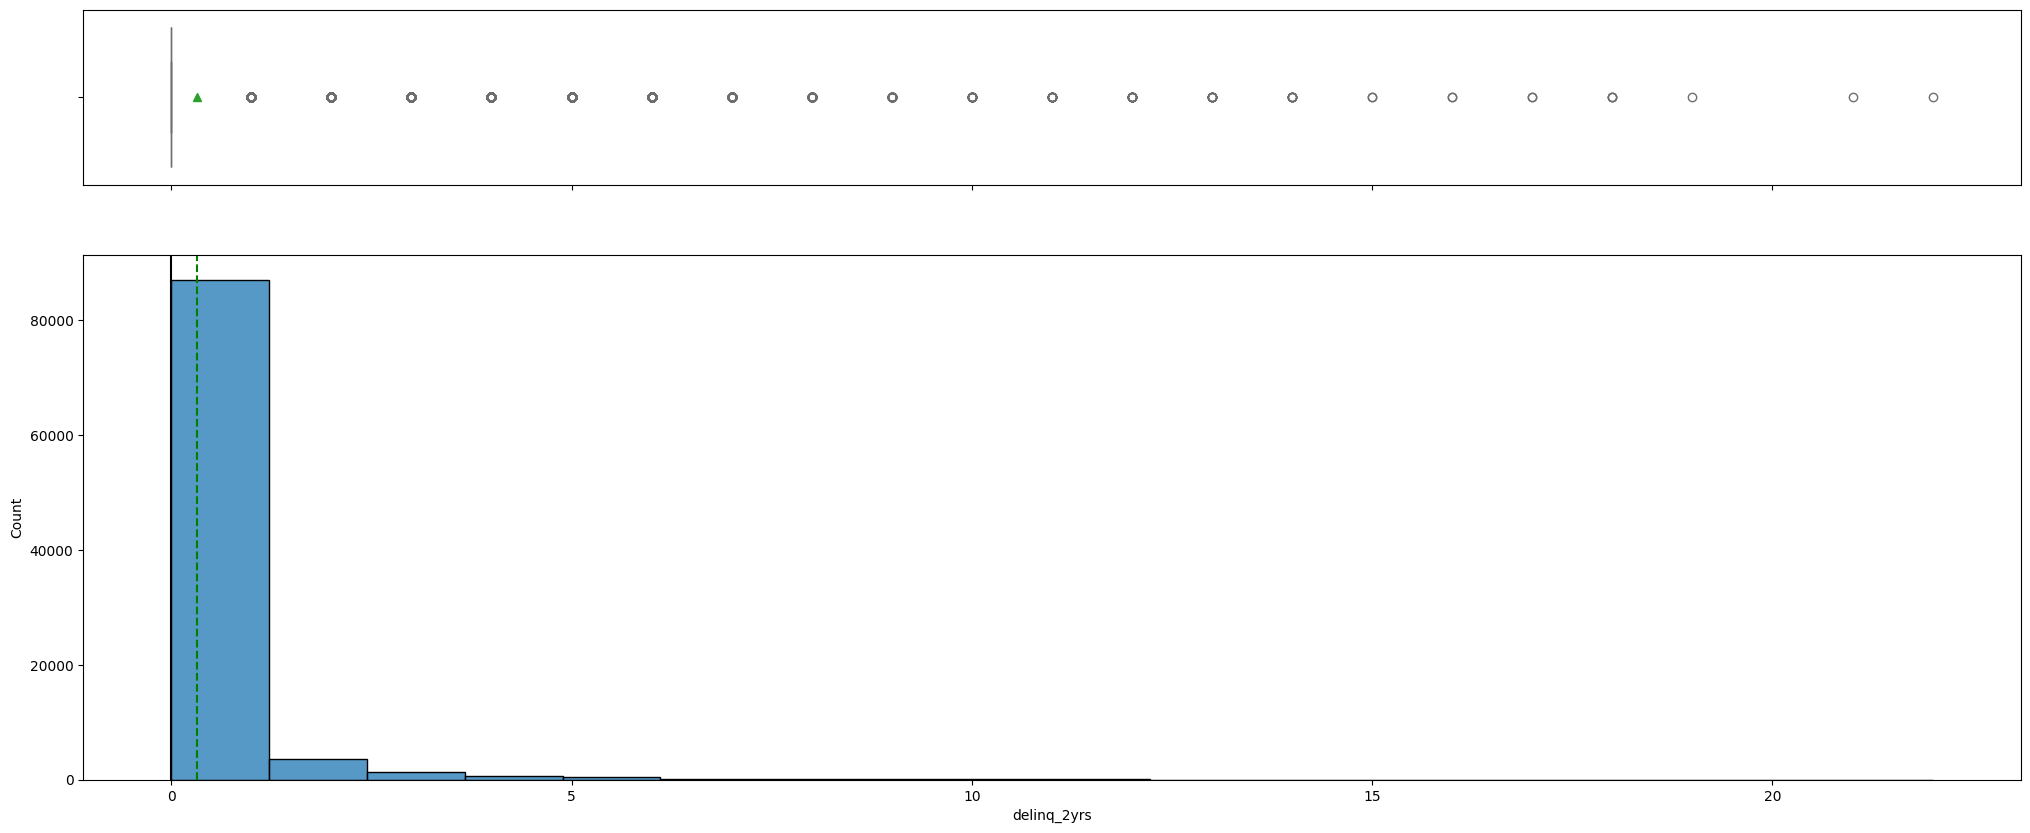

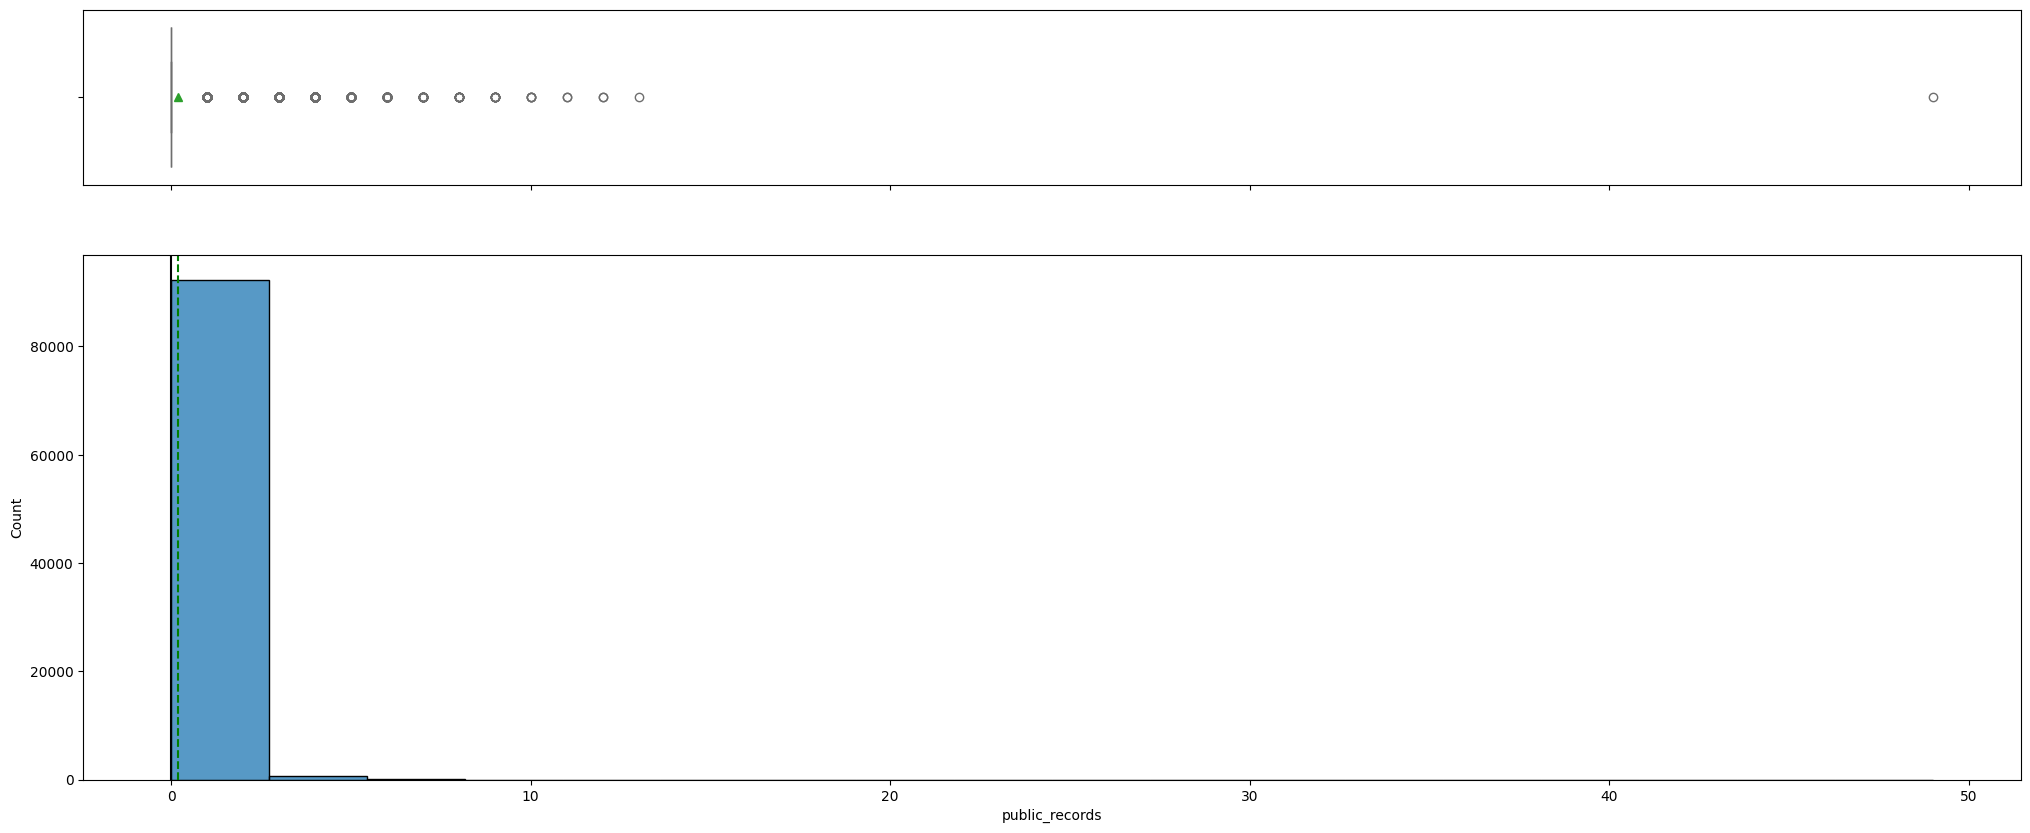

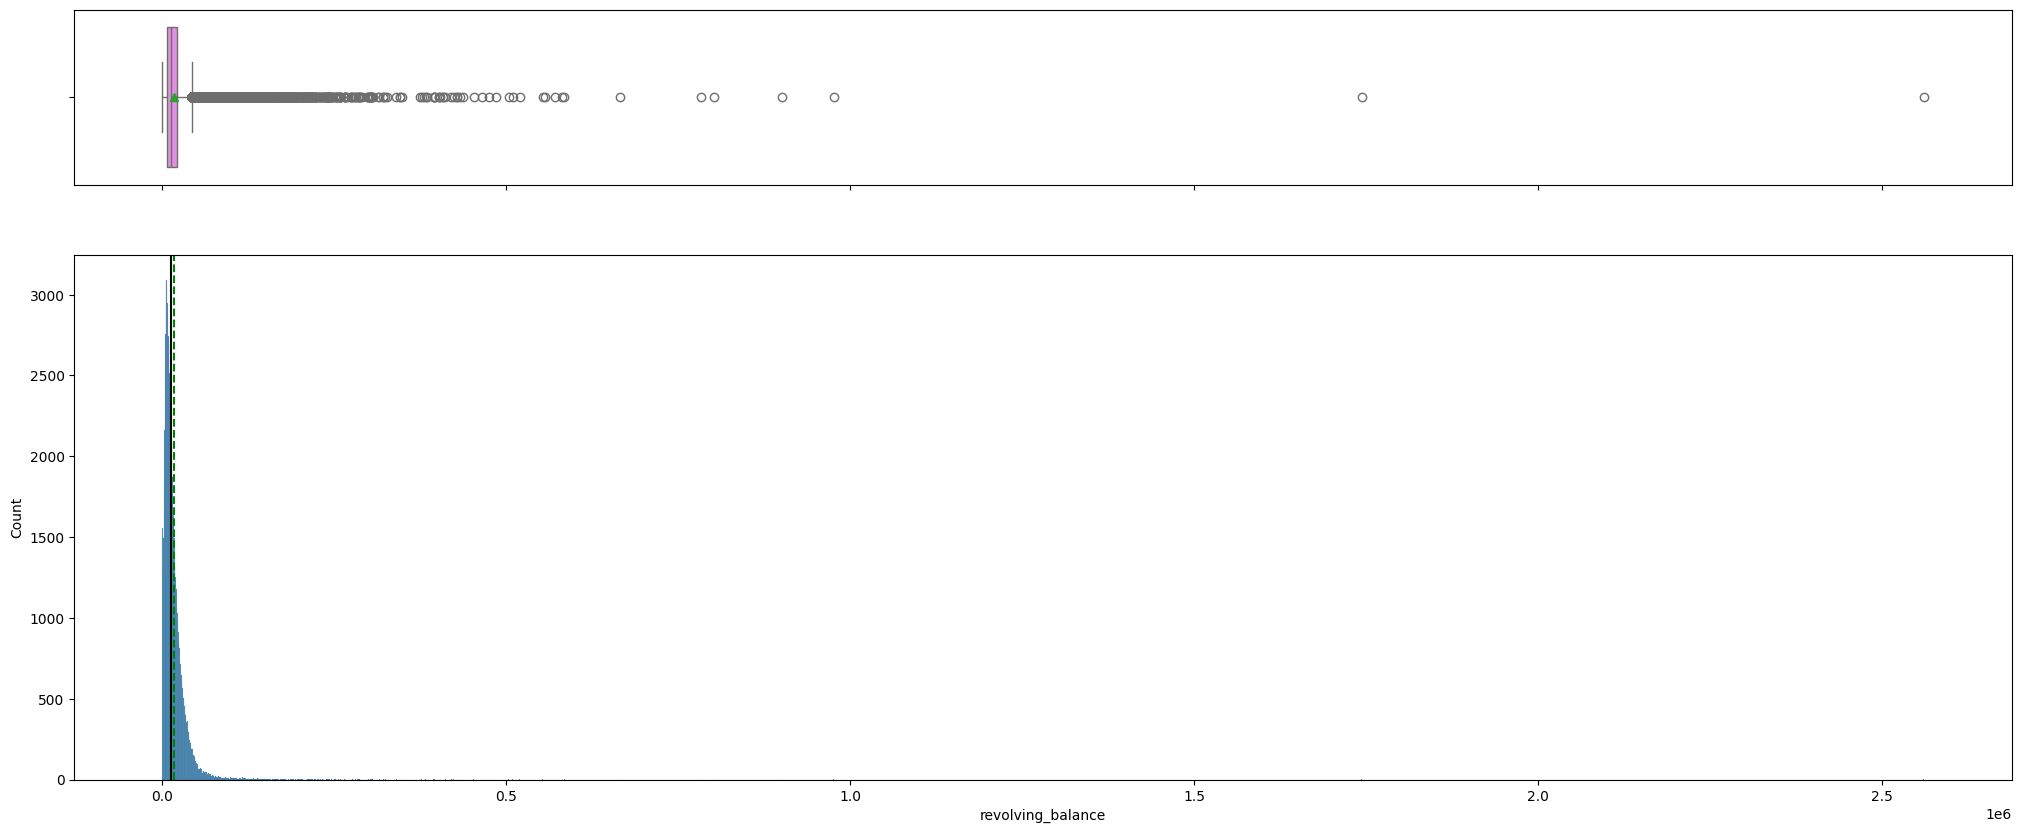

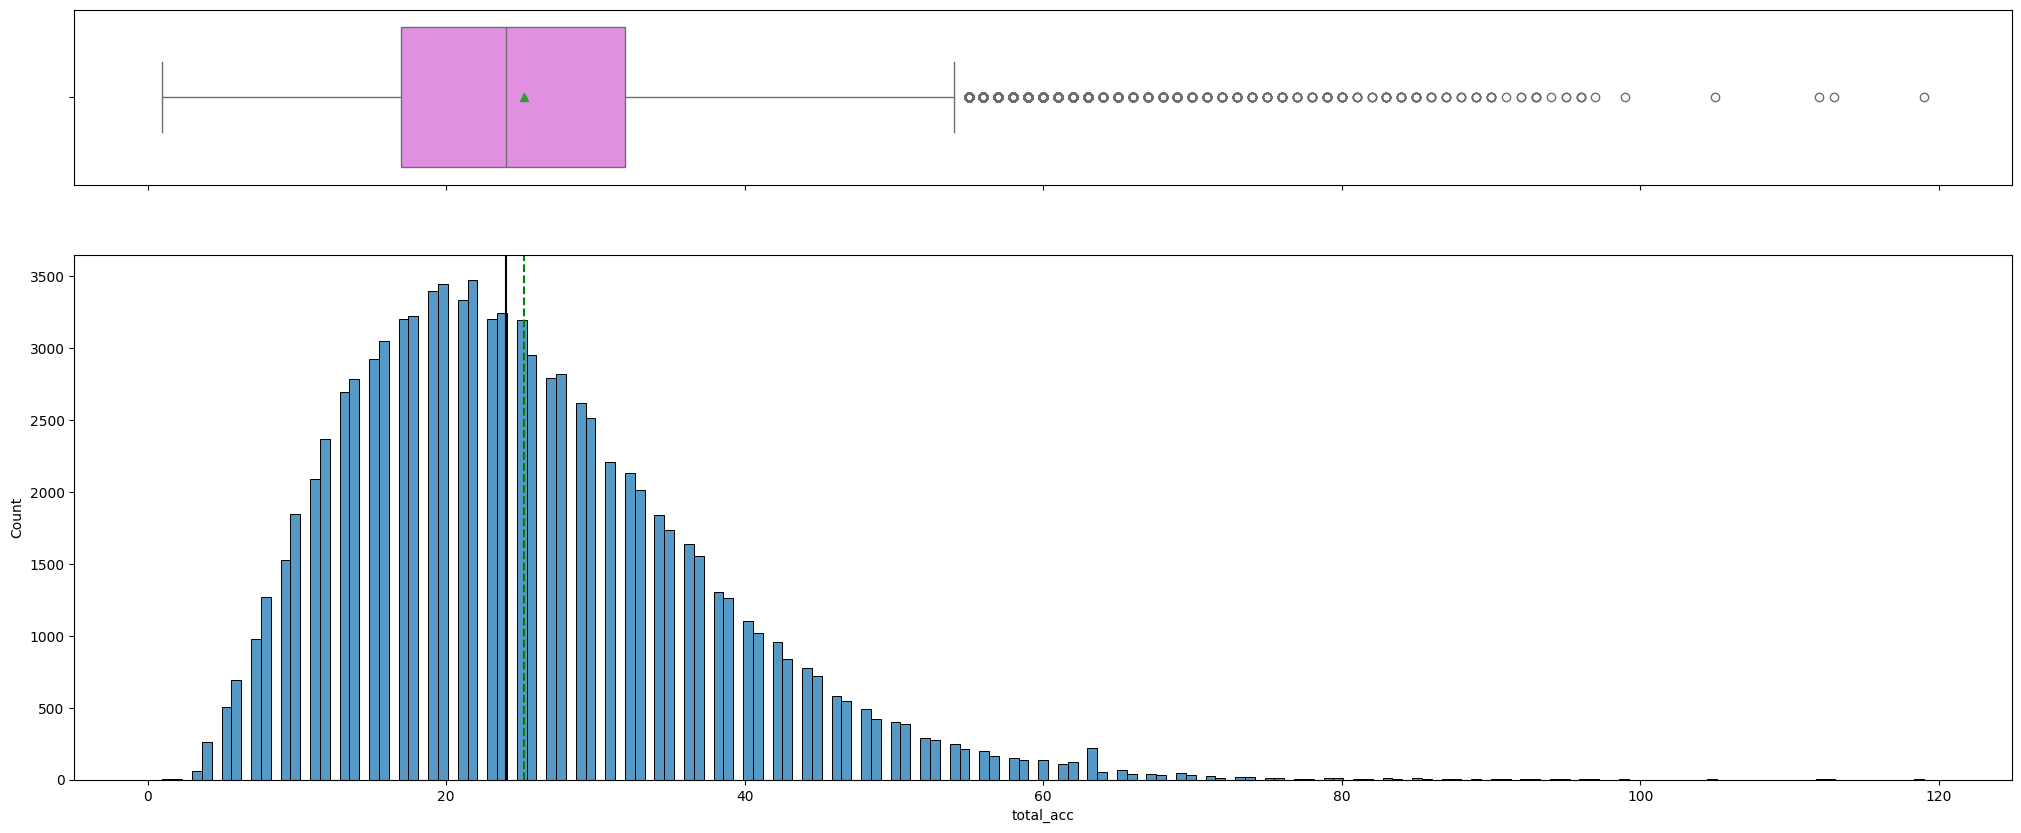

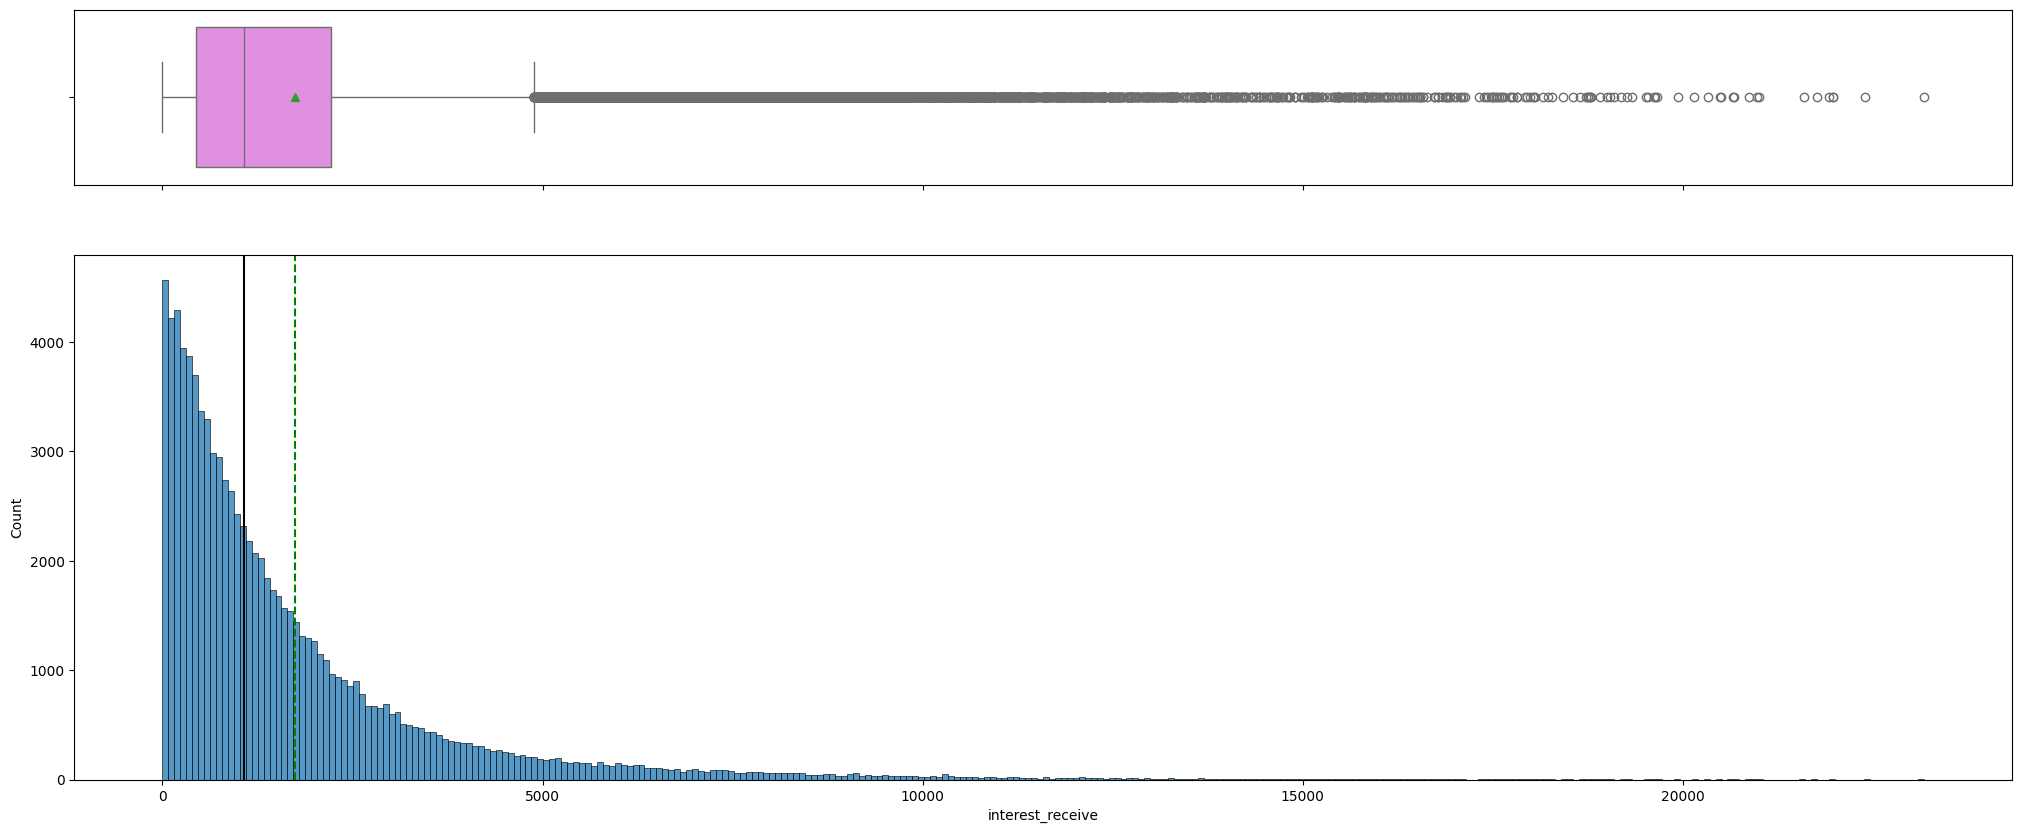

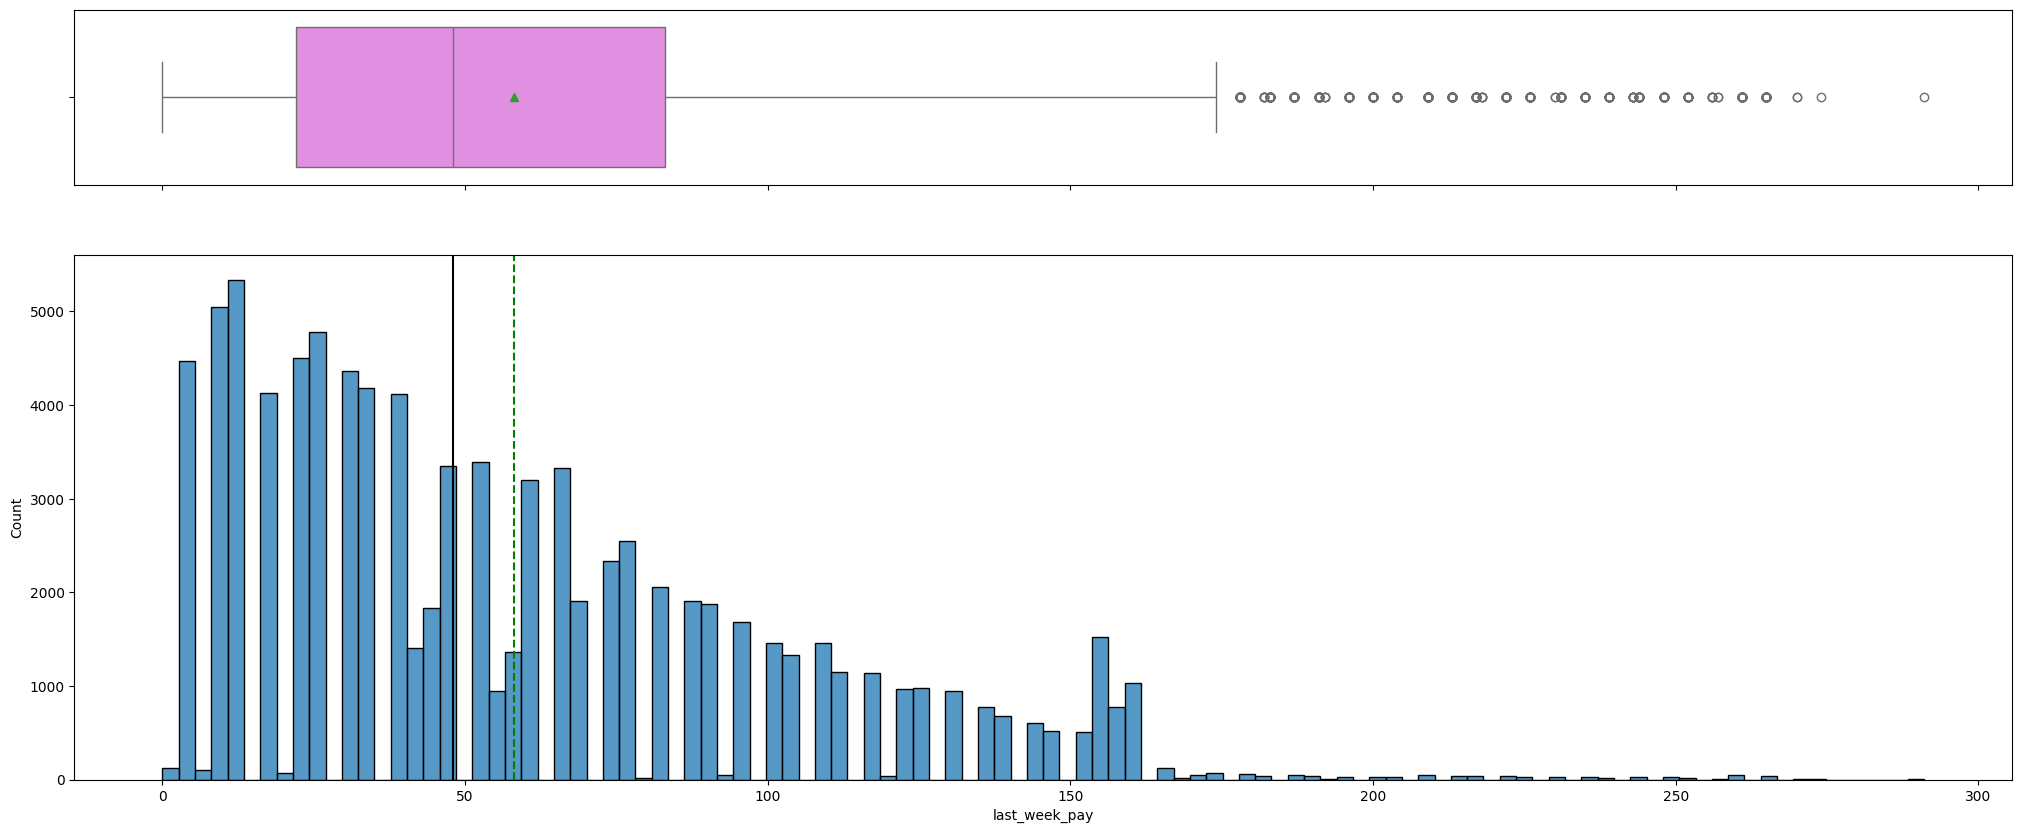

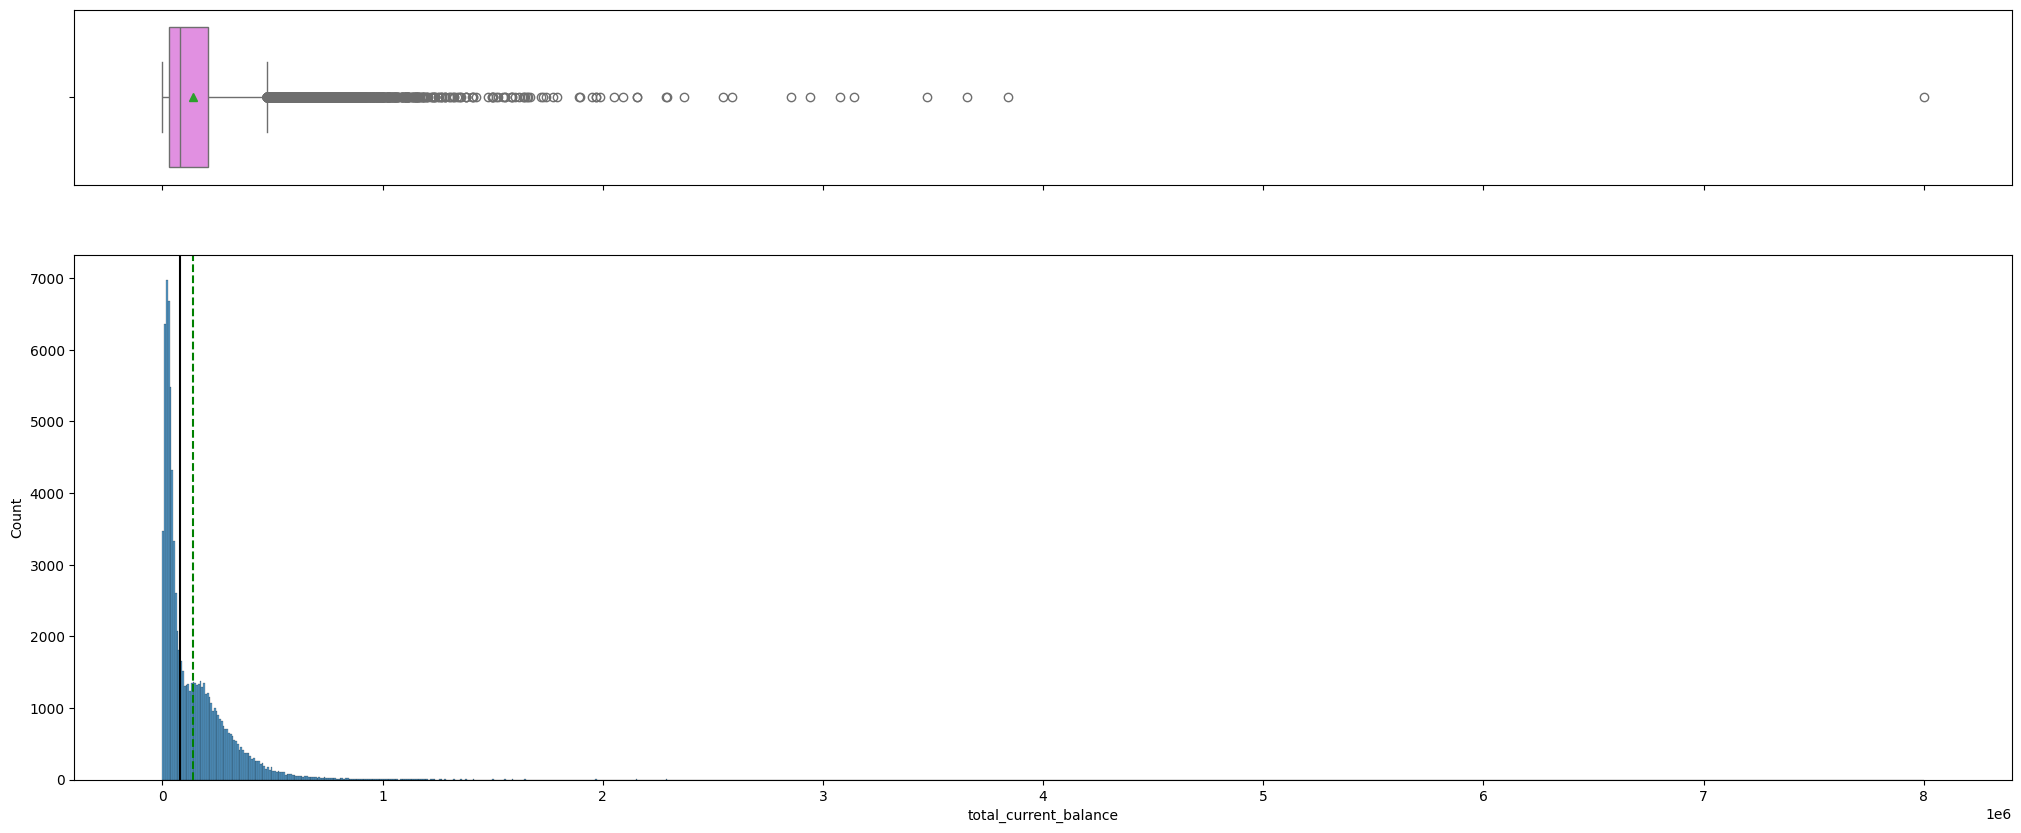

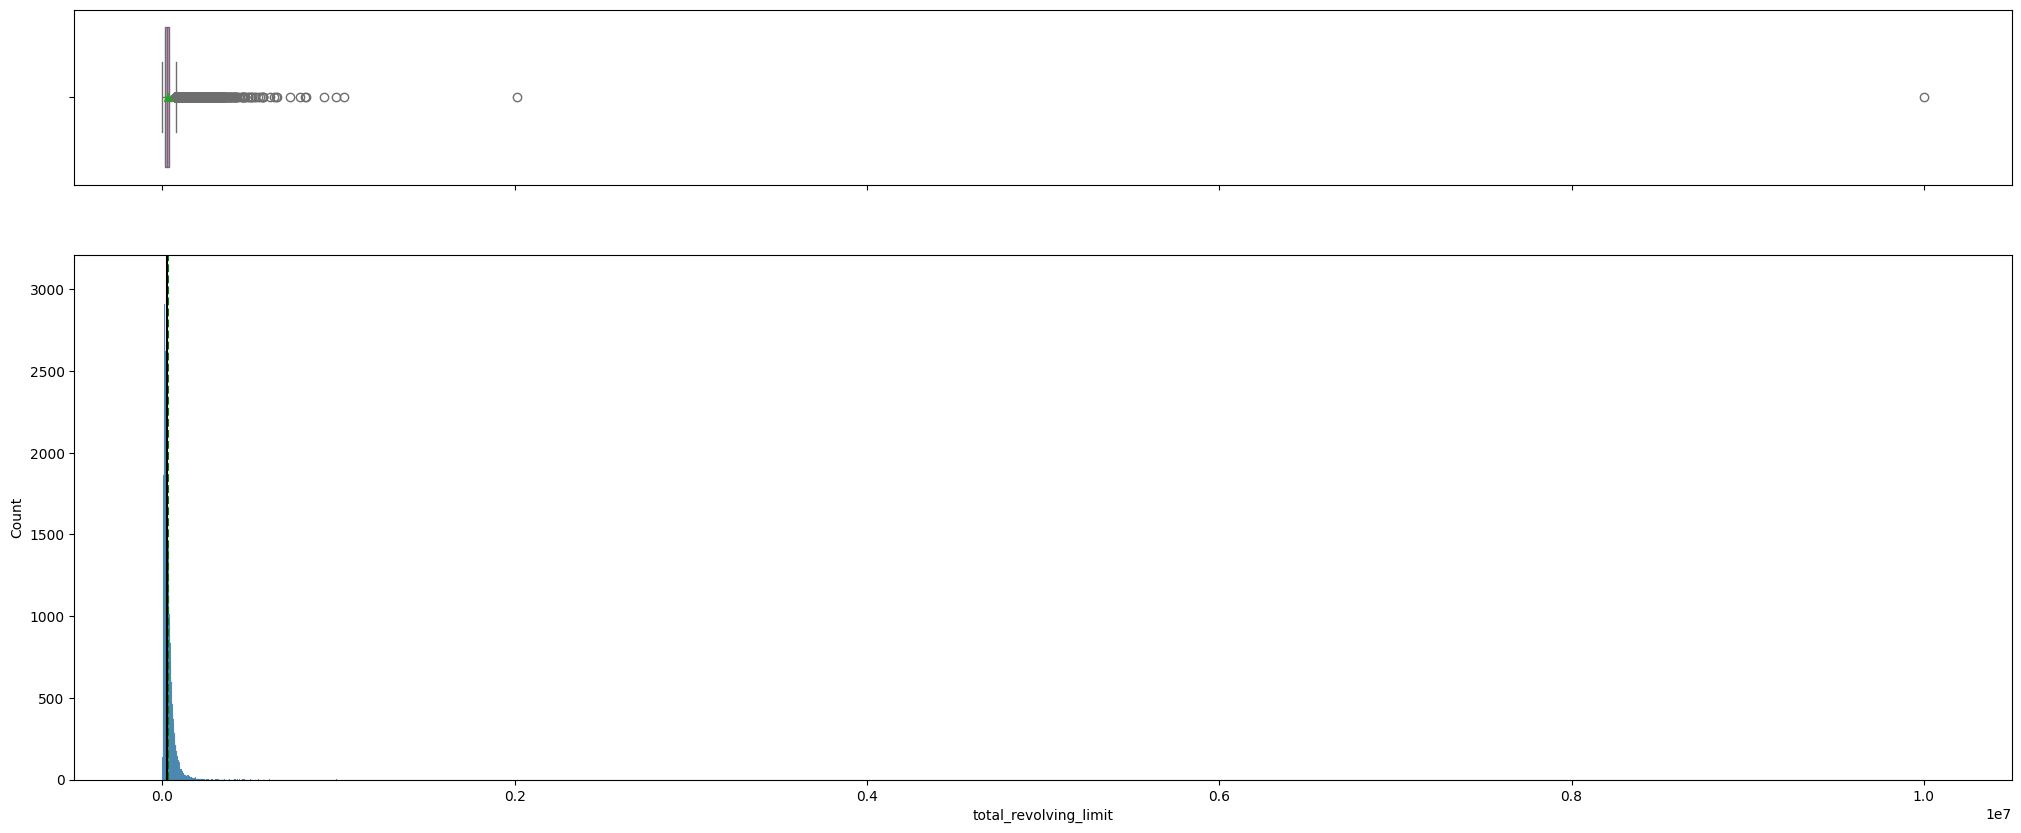

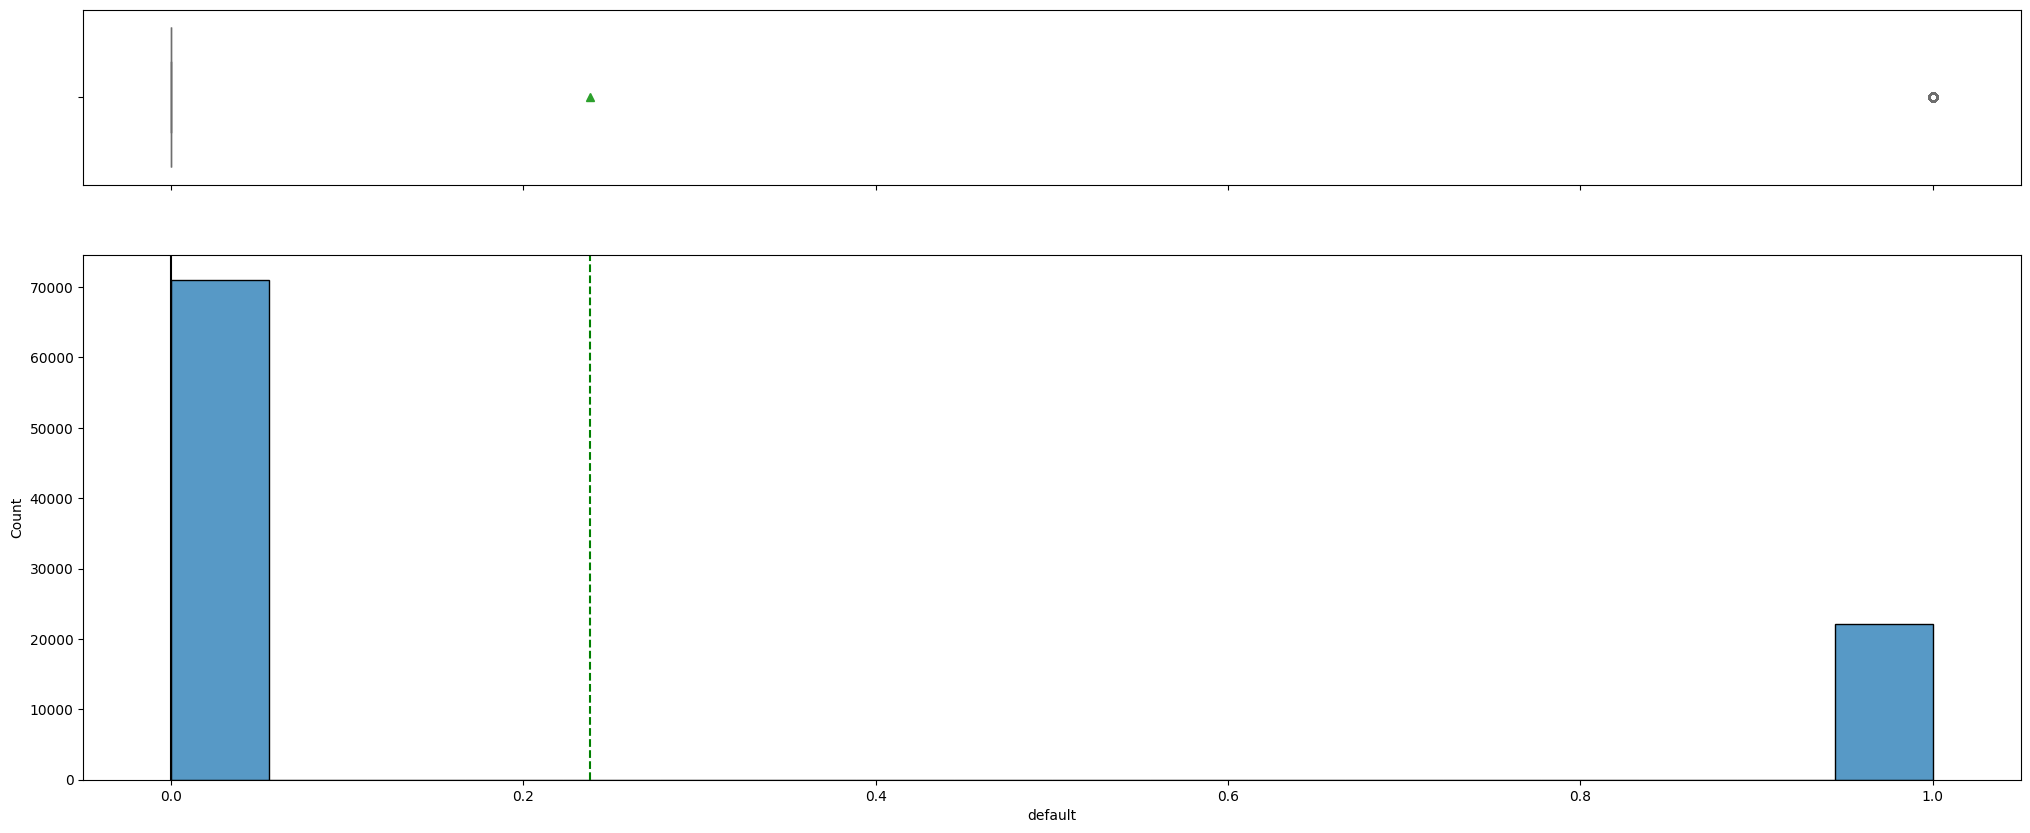

In [19]:
for i in df.select_dtypes(include = 'number').columns:
  histogram_boxplot(df, i)


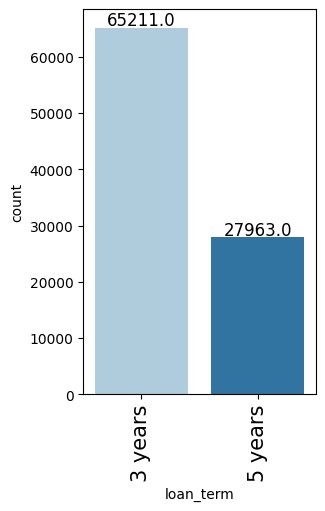

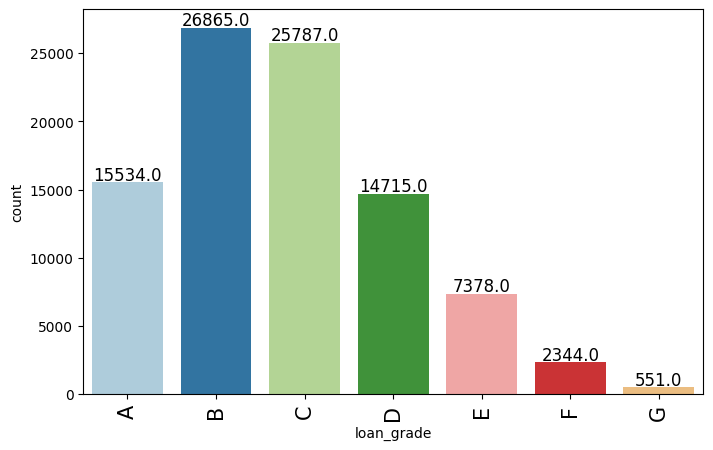

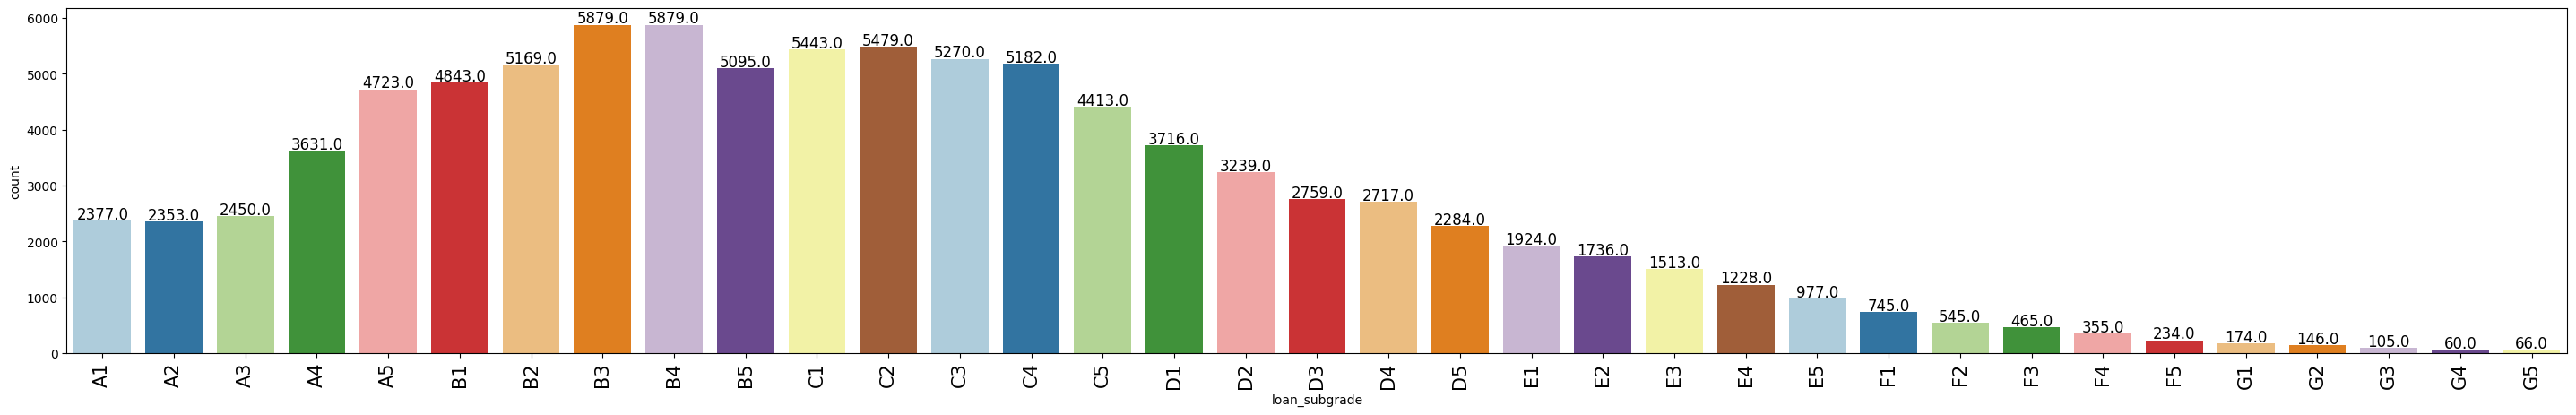

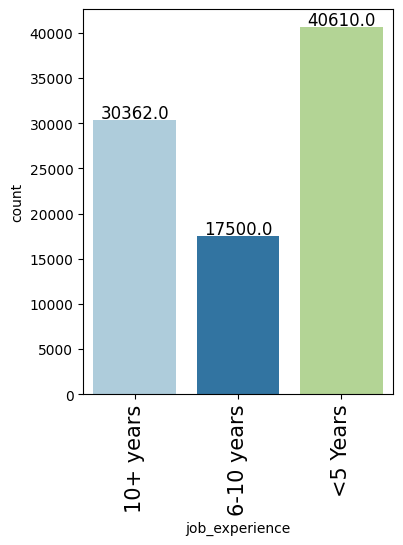

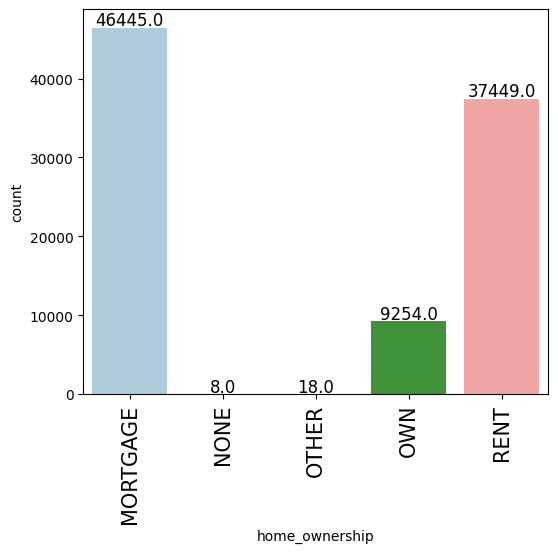

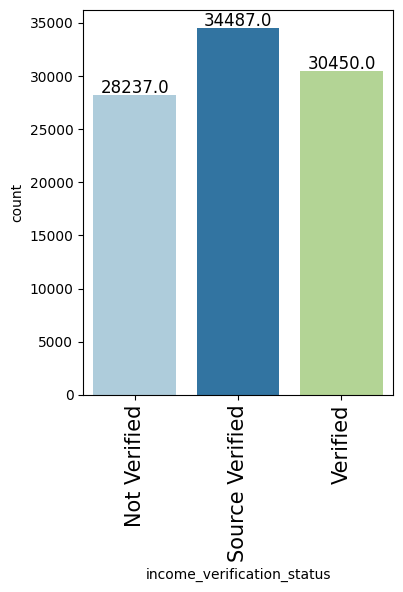

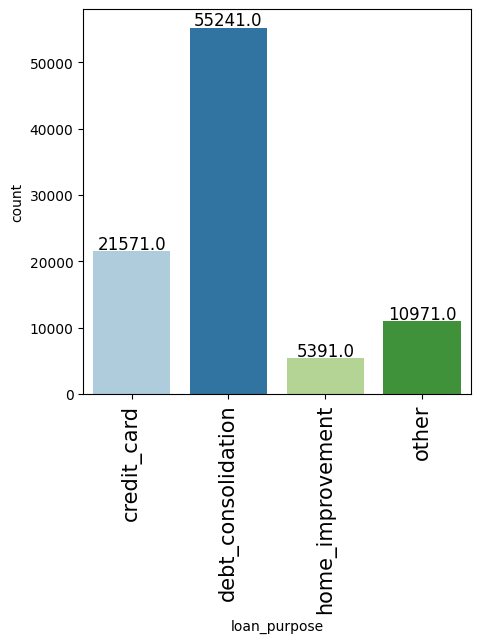

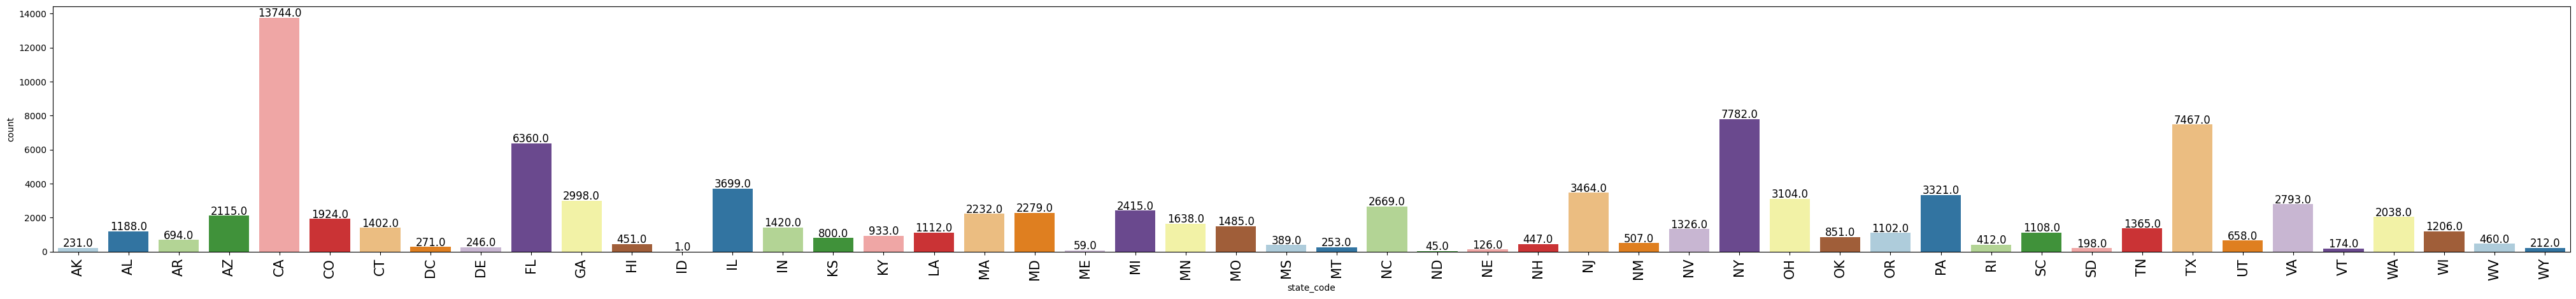

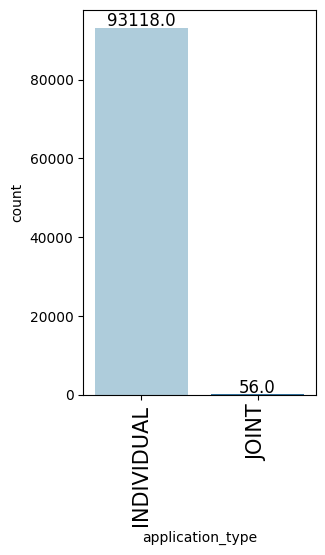

In [16]:
for i in df.select_dtypes(include='object').columns:
  labeled_barplot(df, i)

### Multivariate Analysis

<Axes: >

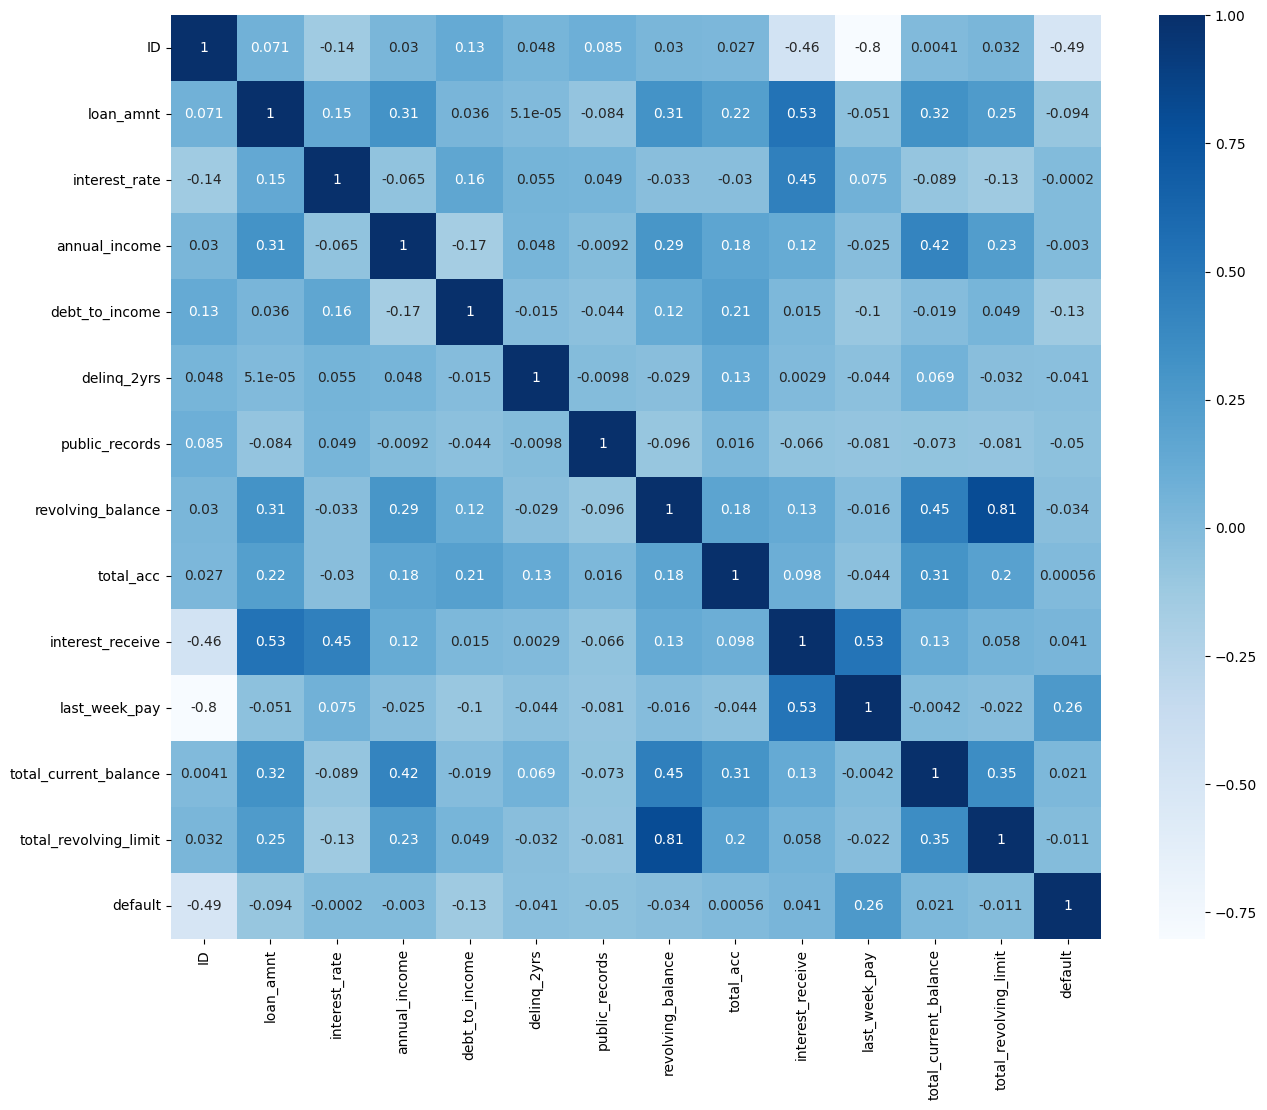

In [21]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")

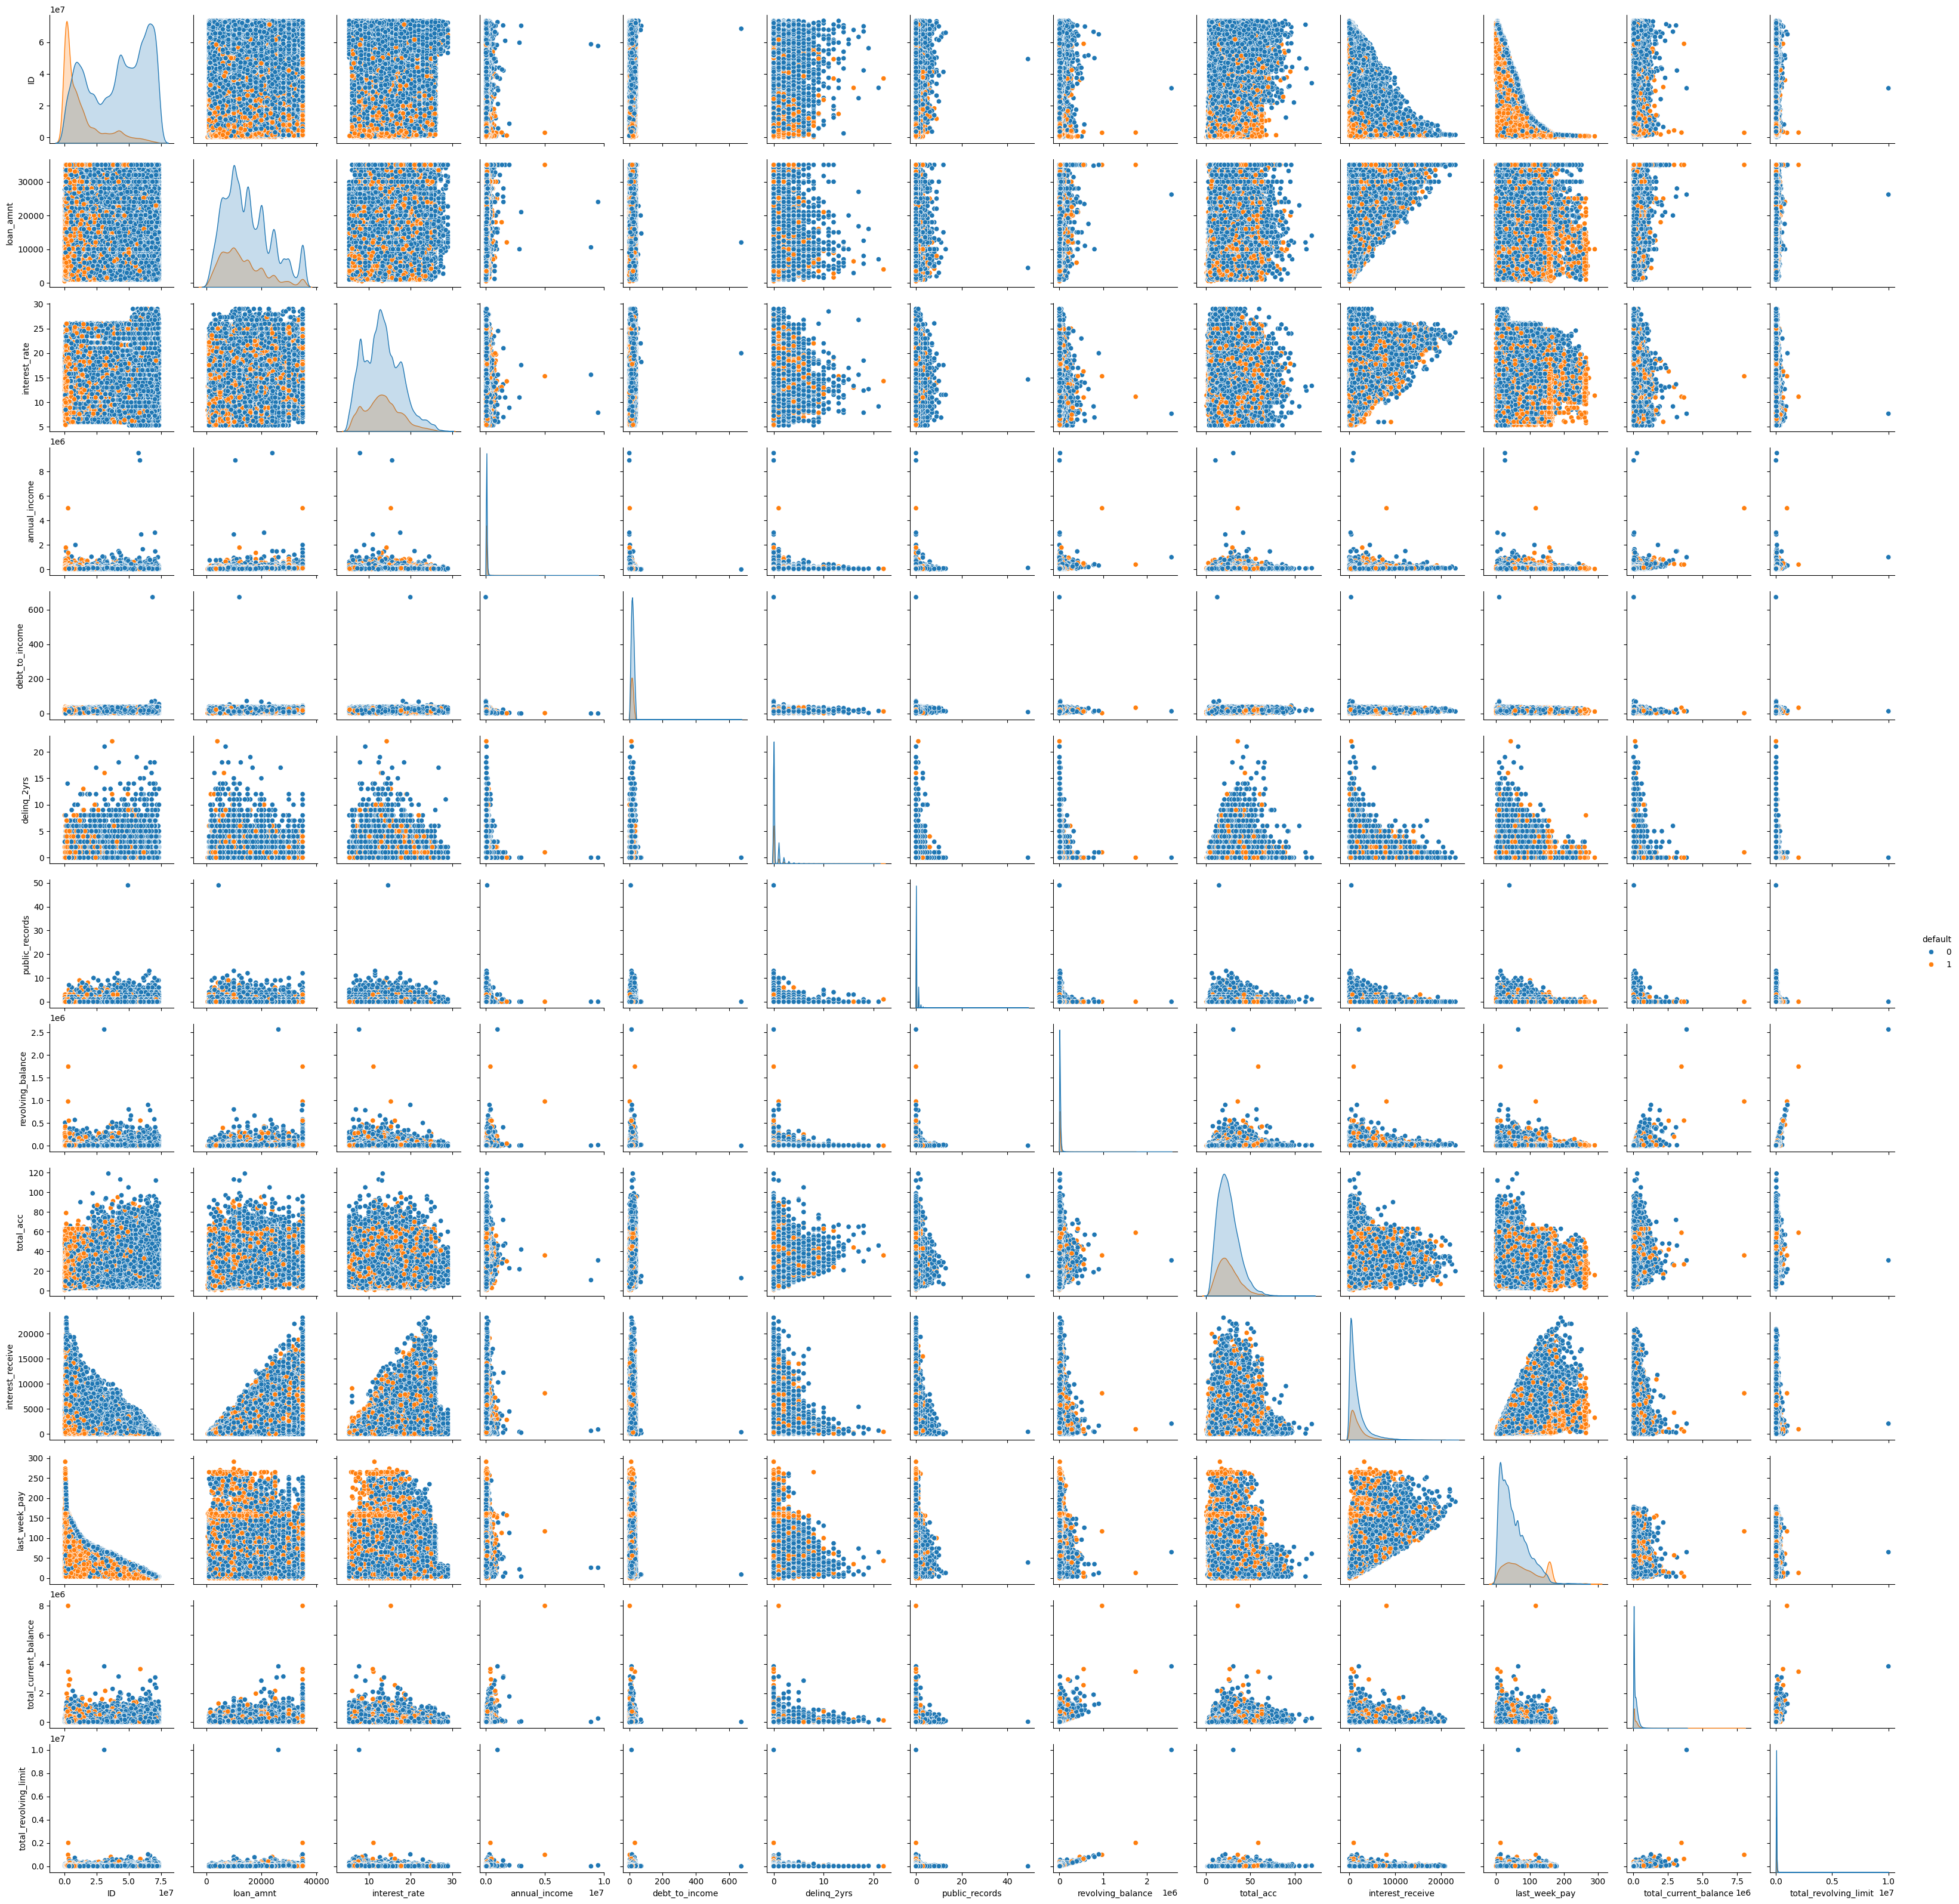

In [22]:
sns.pairplot(df, hue='default')

In [24]:
df.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Columns: 115 entries, loan_amnt to application_type_JOINT
dtypes: float64(10), int64(105)
memory usage: 81.7 MB


## Data Pre-processing

### Feature Engineering



In [5]:
df.drop('ID', axis=1, inplace=True)

In [6]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Define imputers
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

# ---- TRAIN SET ----
# Apply median to numeric continuous columns
df[['last_week_pay','total_revolving_limit','total_current_balance','annual_income']] = \
    imputer_median.fit_transform(df[['last_week_pay','total_revolving_limit','total_current_balance','annual_income']])

# Apply mode to categorical/ordinal-like columns
df[['delinq_2yrs','total_acc','public_records','job_experience']] = \
    imputer_mode.fit_transform(df[['delinq_2yrs','total_acc','public_records','job_experience']])

# Apply mean to total_acc (if needed separately)
df[['total_acc']] = imputer_mean.fit_transform(df[['total_acc']])

# Encode categorical variables
df = pd.get_dummies(data=df, drop_first=True)

# Convert bools to int
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)


In [13]:
df.head()

loan_amnt  interest_rate  annual_income  debt_to_income  revolving_balance  \
0       9000          9.170      85000.000          26.680              39519   
1      18000         13.650      64000.000          31.670               9783   
2      16000          7.260     150000.000          19.700              13641   
3      25000         13.990      59800.000          37.390              35020   
4      17000          6.390      72000.000           8.920              23990   

   total_acc  interest_receive  last_week_pay  total_current_balance  \
0     20.000            59.600          4.000              95493.000   
1     24.000          3348.250         95.000             185433.000   
2     27.000           276.690         13.000             180519.000   
3     35.000          1106.720         17.000             183208.000   
4     26.000           725.290         39.000              23990.000   

   total_revolving_limit  default  loan_term_5 years  loan_grade_B  \
0              84100.000        0                  0             1   
1              13500.000        0                  0             0   
2              19300.000        0                  0             0   
3              55400.000        0                  0             0   
4              81300.000        0                  0             0   

   loan_grade_C  loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
0             0             0             0             0             0   
1             1             0             0             0             0   
2             0             0             0             0             0   
3             1             0             0             0             0   
4             0             0             0             0             0   

   loan_subgrade_A2  loan_subgrade_A3  loan_subgrade_A4  loan_subgrade_A5  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 1                 0   
3                 0                 0                 0                 0   
4                 1                 0                 0                 0   

   loan_subgrade_B1  loan_subgrade_B2  loan_subgrade_B3  loan_subgrade_B4  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   loan_subgrade_B5  loan_subgrade_C1  loan_subgrade_C2  loan_subgrade_C3  \
0                 0                 0                 0                 0   
1                 0                 1                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   loan_subgrade_C4  loan_subgrade_C5  loan_subgrade_D1  loan_subgrade_D2  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 0                 0                 0   

   loan_subgrade_D3  loan_subgrade_D4  loan_subgrade_D5  loan_subgrade_E1  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0              

rename those columns as the model will not accept feature names having special characters.

In [7]:
df = df.rename(columns={'job_experience_6-10 years': 'JobExp_morethan5', 'job_experience_<5 Years': 'JobExp_lessthan5'})


### Data Preparation for modeling

In [48]:
data = df.copy()

In [49]:
X = data.drop('default', axis=1)
y = data['default']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

print(X_train.shape, X_val.shape)

(74539, 147) (18635, 147)


## Model Building

### Model Evaluation Criterion

In [10]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [11]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model building

In [51]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Catboost", CatBoostClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = accuracy_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
  model.fit(X_train, y_train)
  scores_val = accuracy_score(y_val, model.predict(X_val))
  print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9866244516293484
Random forest: 1.0
GBM: 0.8240652544305666
Adaboost: 0.7926186291739895
dtree: 1.0
Xgboost: 0.9006157850252888
Learning rate set to 0.064929
0:	learn: 0.6585946	total: 40.3ms	remaining: 40.3s
1:	learn: 0.6322041	total: 58.5ms	remaining: 29.2s
2:	learn: 0.6049214	total: 77.8ms	remaining: 25.9s
3:	learn: 0.5852839	total: 95.5ms	remaining: 23.8s
4:	learn: 0.5665959	total: 114ms	remaining: 22.7s
5:	learn: 0.5543999	total: 131ms	remaining: 21.6s
6:	learn: 0.5418121	total: 151ms	remaining: 21.4s
7:	learn: 0.5307922	total: 169ms	remaining: 20.9s
8:	learn: 0.5212353	total: 186ms	remaining: 20.5s
9:	learn: 0.5108895	total: 205ms	remaining: 20.3s
10:	learn: 0.5031464	total: 223ms	remaining: 20s
11:	learn: 0.4960978	total: 242ms	remaining: 19.9s
12:	learn: 0.4910827	total: 259ms	remaining: 19.6s
13:	learn: 0.4862210	total: 276ms	remaining: 19.4s
14:	learn: 0.4817367	total: 294ms	remaining: 19.3s
15:	learn: 0.4772953	total: 313ms	remaining: 19.2s

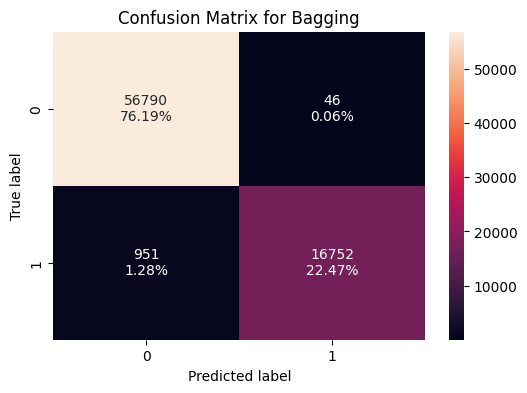



   Accuracy  Recall  Precision    F1
0     0.987   0.946      0.997 0.971


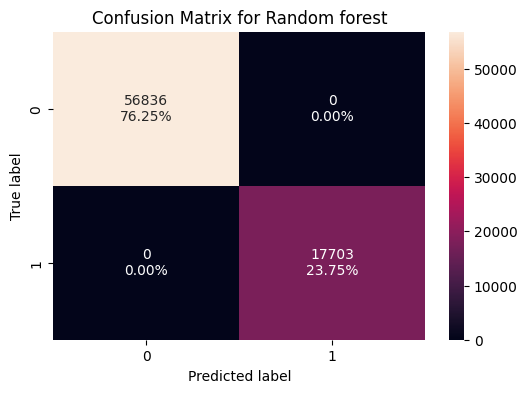



   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


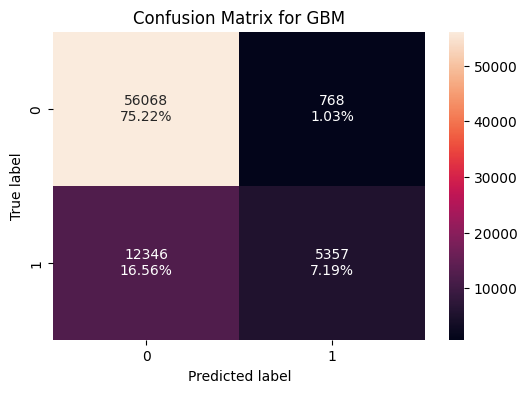



   Accuracy  Recall  Precision    F1
0     0.824   0.303      0.875 0.450


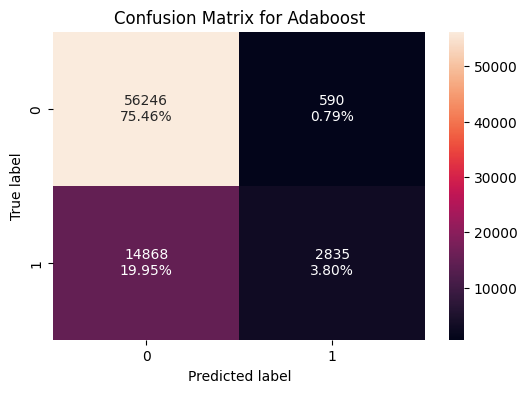



   Accuracy  Recall  Precision    F1
0     0.793   0.160      0.828 0.268


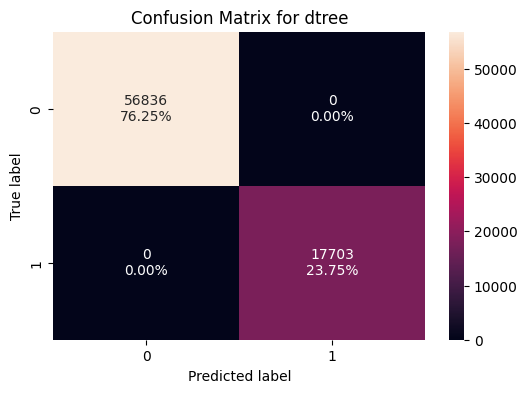



   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


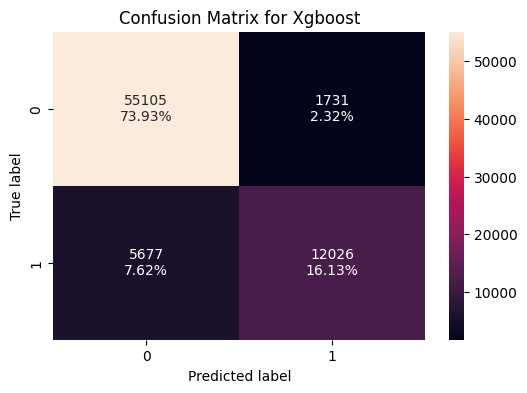



   Accuracy  Recall  Precision    F1
0     0.901   0.679      0.874 0.765


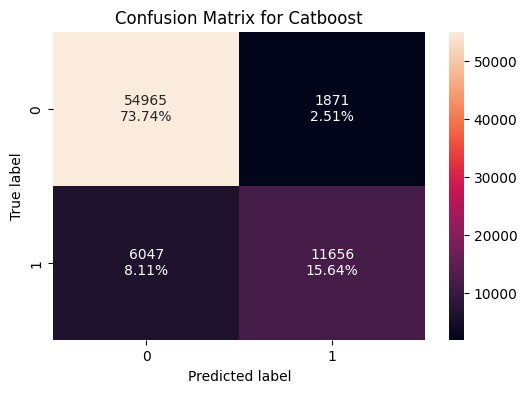



   Accuracy  Recall  Precision    F1
0     0.894   0.658      0.862 0.746


In [53]:
# Dictionary to store performance metrics
model_perf = {}

for name, model in models:
    confusion_matrix_sklearn(model, X_train, y_train)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print("\n")
    model_perf[name] = model_performance_classification_sklearn(model, X_train, y_train)
    print(model_perf[name])


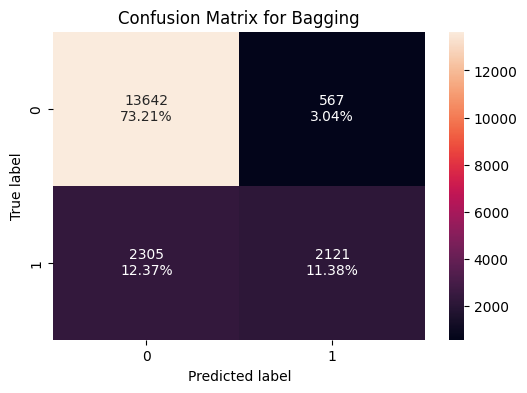



   Accuracy  Recall  Precision    F1
0     0.846   0.479      0.789 0.596


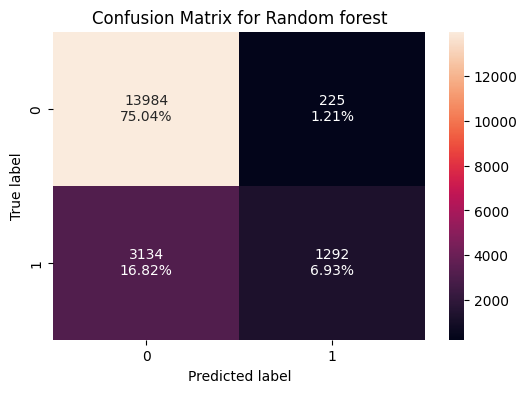



   Accuracy  Recall  Precision    F1
0     0.820   0.292      0.852 0.435


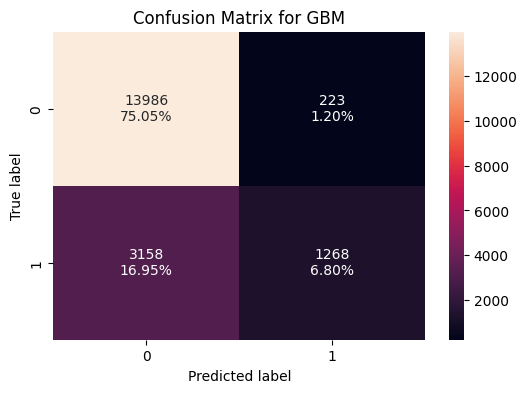



   Accuracy  Recall  Precision    F1
0     0.819   0.286      0.850 0.429


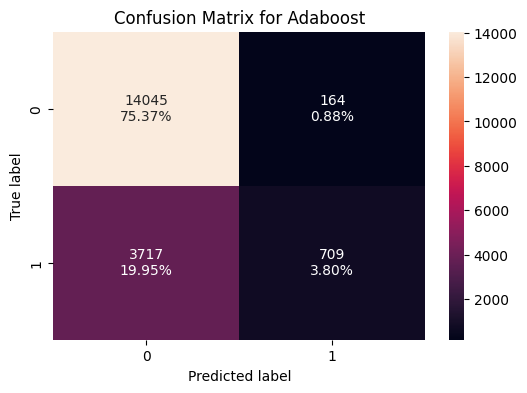



   Accuracy  Recall  Precision    F1
0     0.792   0.160      0.812 0.268


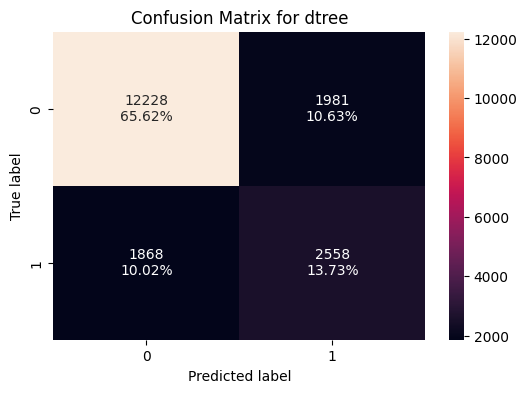



   Accuracy  Recall  Precision    F1
0     0.793   0.578      0.564 0.571


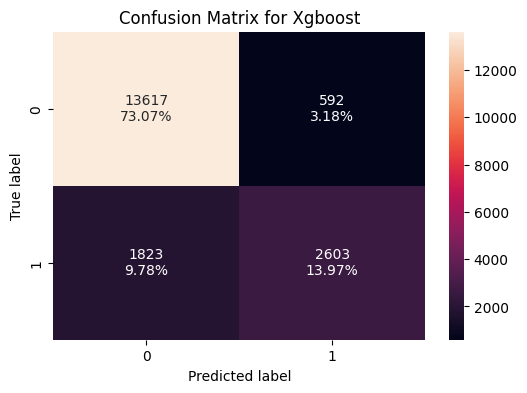



   Accuracy  Recall  Precision    F1
0     0.870   0.588      0.815 0.683


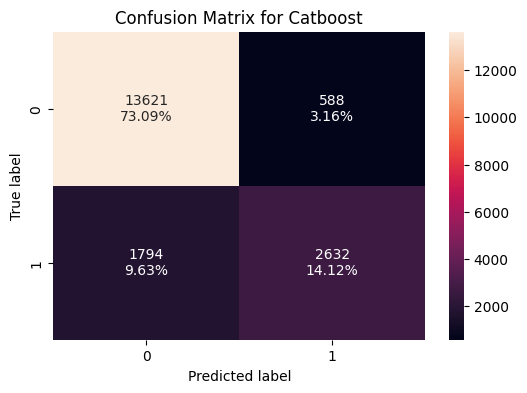



   Accuracy  Recall  Precision    F1
0     0.872   0.595      0.817 0.688


In [54]:
model_perf_val = {}

for name, model in models:
    confusion_matrix_sklearn(model, X_val, y_val)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print("\n")
    model_perf_val[name] = model_performance_classification_sklearn(model, X_val, y_val)
    print(model_perf_val[name])

In [57]:
df_perf = pd.concat(model_perf.values(), keys=model_perf.keys())

# Reset index
df_perf.reset_index(level=1, drop=True, inplace=True)
df_perf.reset_index(inplace=True)
df_perf.rename(columns={'index':'Model'}, inplace=True)

# Display nicely
print(df_perf)

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.987   0.946      0.997 0.971
1  Random forest     1.000   1.000      1.000 1.000
2            GBM     0.824   0.303      0.875 0.450
3       Adaboost     0.793   0.160      0.828 0.268
4          dtree     1.000   1.000      1.000 1.000
5        Xgboost     0.901   0.679      0.874 0.765
6       Catboost     0.894   0.658      0.862 0.746


In [58]:
df_perf_val = pd.concat(model_perf_val.values(), keys=model_perf_val.keys())

# Reset index
df_perf_val.reset_index(level=1, drop=True, inplace=True)
df_perf_val.reset_index(inplace=True)
df_perf_val.rename(columns={'index':'Model'}, inplace=True)

# Display nicely
print(df_perf_val)

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.846   0.479      0.789 0.596
1  Random forest     0.820   0.292      0.852 0.435
2            GBM     0.819   0.286      0.850 0.429
3       Adaboost     0.792   0.160      0.812 0.268
4          dtree     0.793   0.578      0.564 0.571
5        Xgboost     0.870   0.588      0.815 0.683
6       Catboost     0.872   0.595      0.817 0.688


Best Accuracy is provided my Catboost in the test data. There isnt a huge difference between train and test. Thus we can say the model is safe from overfitting problem.

In [12]:
Test_set = pd.read_csv("Test_set.csv")

In [31]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [13]:
T_set = Test_set.copy()

In [14]:
Test_set.drop('ID', axis=1, inplace=True)

# Apply the SAME imputers (already fitted on train)
Test_set[['last_week_pay','total_revolving_limit','total_current_balance','annual_income']] = \
    imputer_median.transform(Test_set[['last_week_pay','total_revolving_limit','total_current_balance','annual_income']])

Test_set[['delinq_2yrs','total_acc','public_records','job_experience']] = \
    imputer_mode.transform(Test_set[['delinq_2yrs','total_acc','public_records','job_experience']])

Test_set[['total_acc']] = imputer_mean.transform(Test_set[['total_acc']])

# Apply same encoding
Test_set = pd.get_dummies(data=Test_set, drop_first=True)

# Convert bools to int
for col in Test_set.select_dtypes(include='bool').columns:
    Test_set[col] = Test_set[col].astype(int)

# ⚠️ Ensure both train and test have the same columns after dummies
Test_set = Test_set.reindex(columns=X_train.columns, fill_value=0)

In [59]:
for name, model in models:
  if name == "Catboost":
    predictions = model.predict(Test_set)
    test_df = pd.DataFrame({
        "ID": T_set["ID"],
        "default": predictions
    })

    print("Model Name: {}: {}".format(name, test_df))
    test_df.to_csv(f"{name}.csv", index=False)

Model Name: Catboost:              ID  default
0       4855329        1
1      66862420        0
2       3637416        1
3      53682249        0
4      53937165        0
...         ...      ...
39928  57779318        0
39929  59742362        0
39930  72657145        0
39931  15220189        0
39932  21810584        0

[39933 rows x 2 columns]


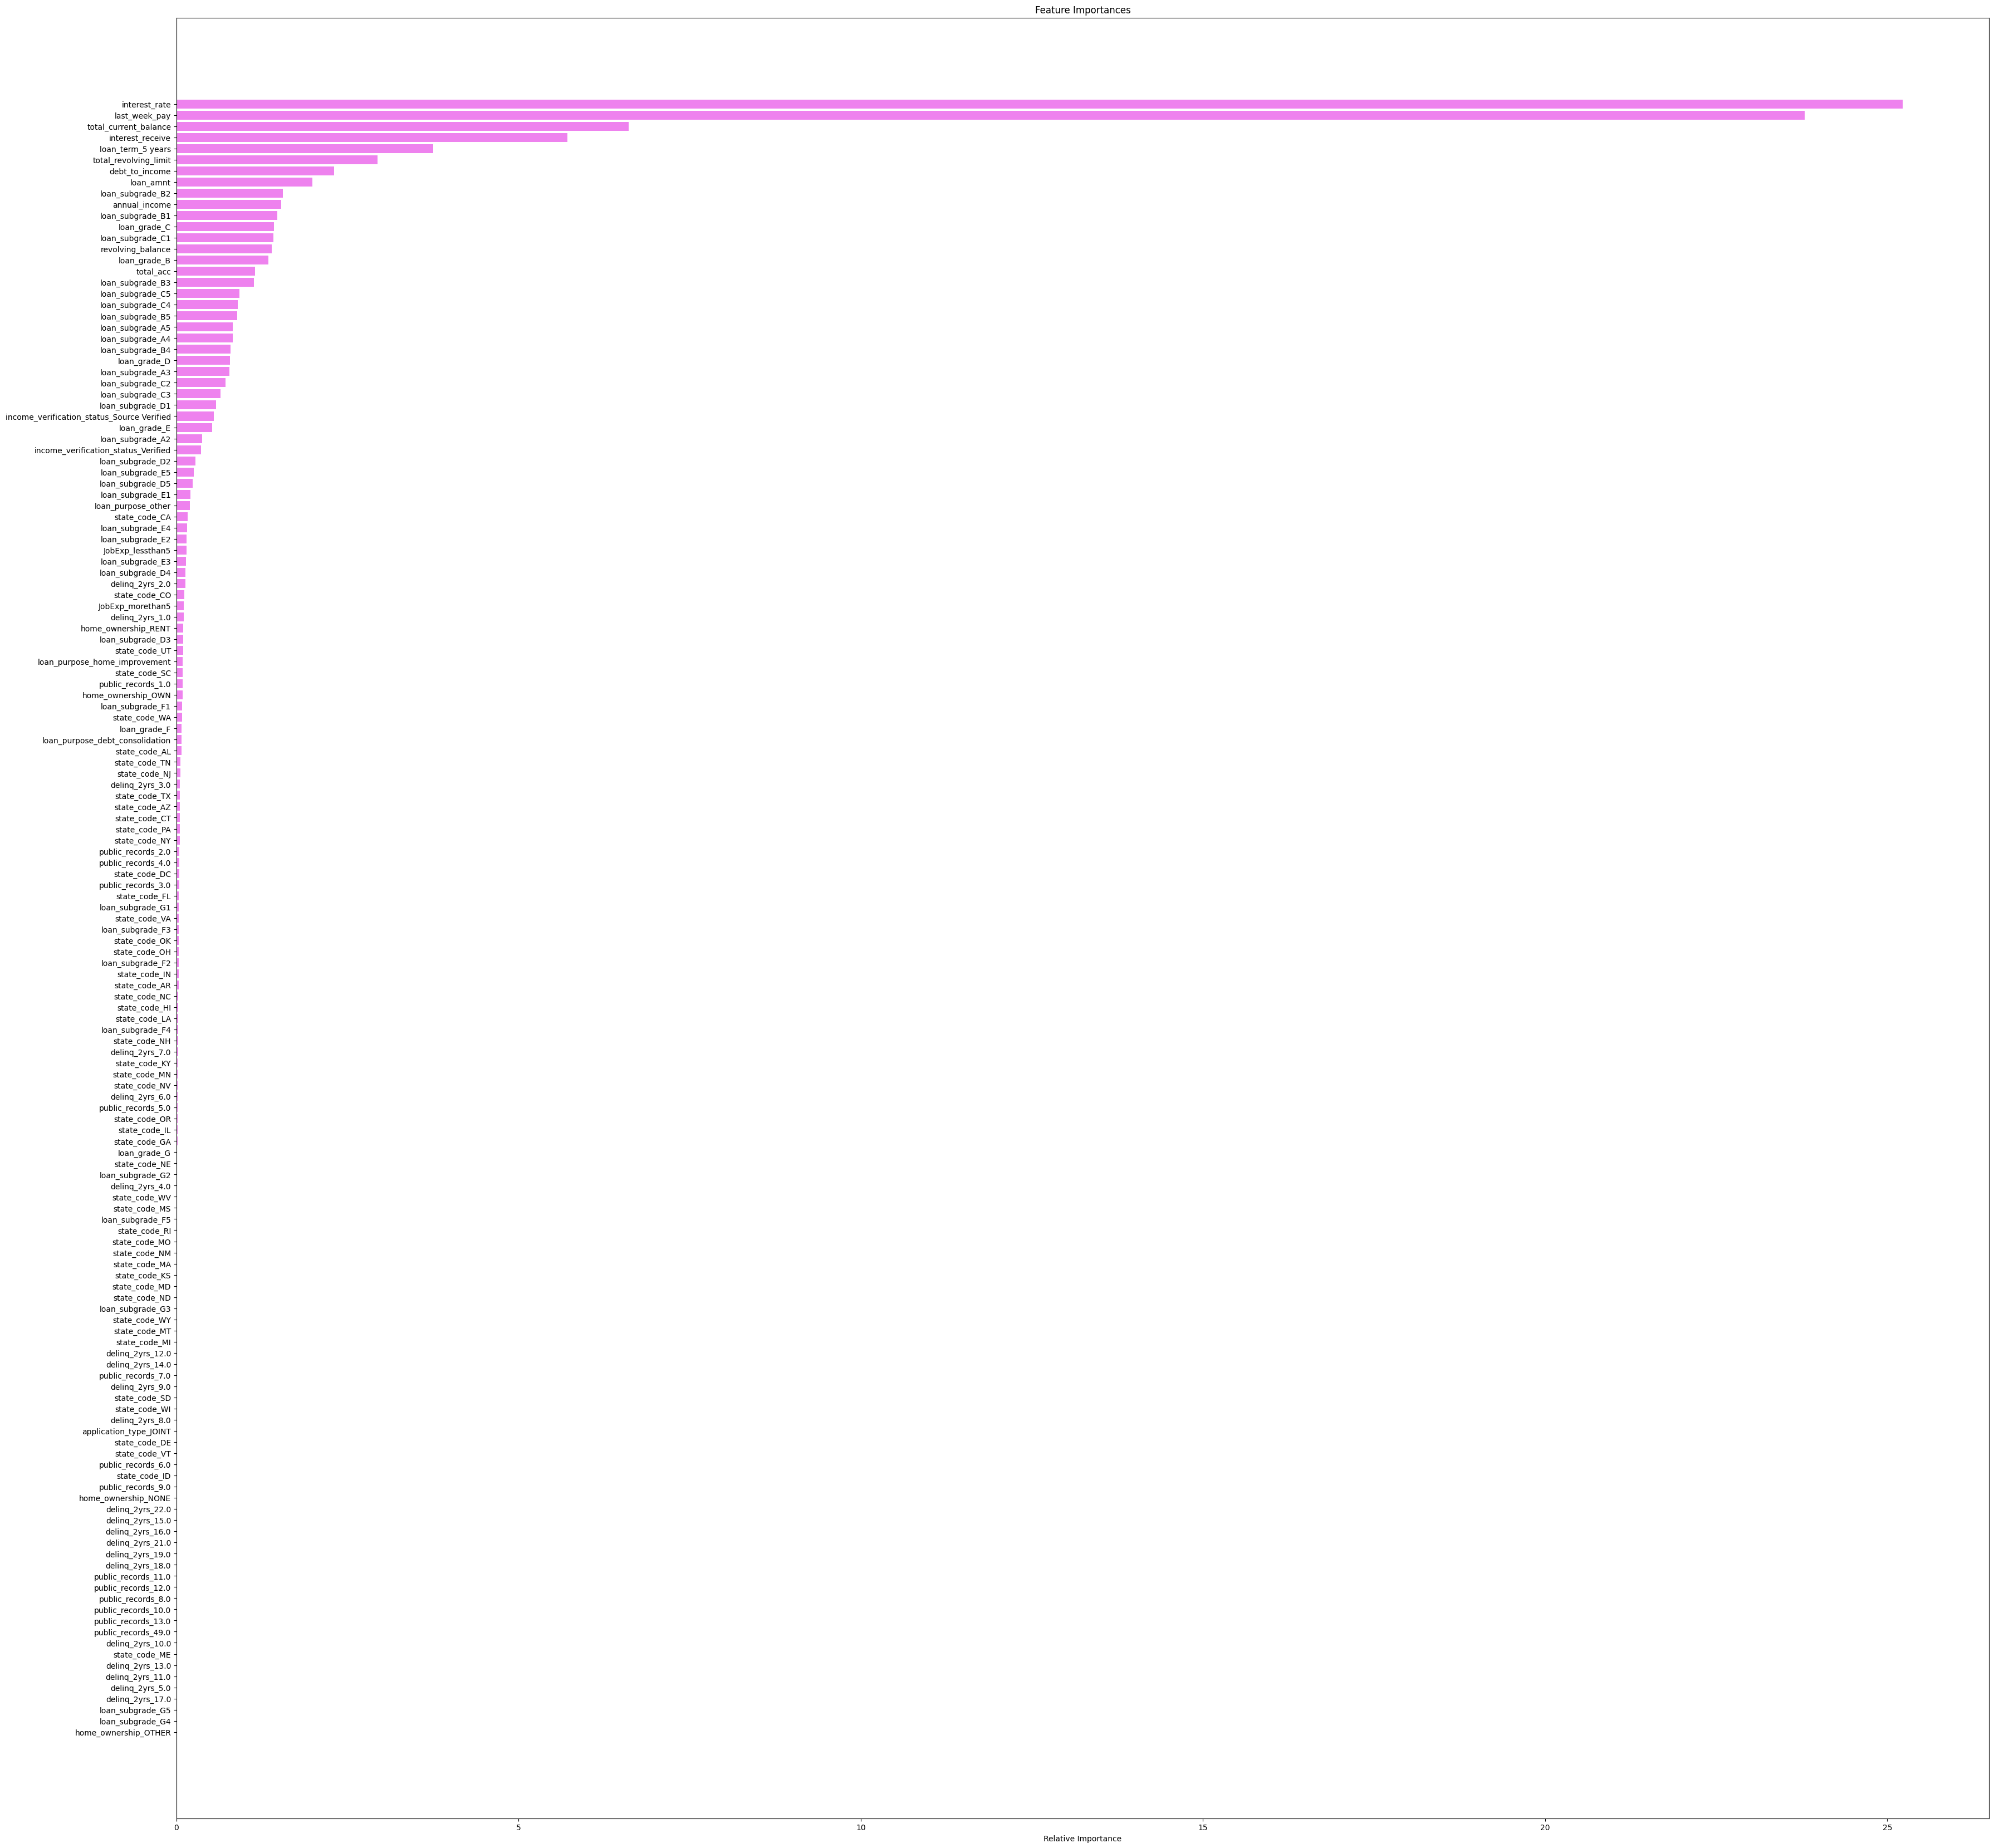

In [60]:
for name, model in models:
    if name == "Catboost":
        feature_names = X_train.columns
        importances = model.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(42, 42))
        plt.title("Feature Importances")
        plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel("Relative Importance")
        plt.show()